# Australian Migration

#### Background

As a temporary migrant to Australia myself as a small child and for a longer period of 7 years from 2006 to 2013 with my own family, I was aware that Australia had been a destination for people from the UK for many decades. I was interested to investigate this topic further using current available data.

This notebook investigates country of origin for migration to Australia over the period 2005 to 2023 using the available statistics. The figures are derived from the Australian Bureau of Statistics and are reported for financial years ended 30 June for each year.

The purpose of the study is to examine migration trends and patterns and derive any interesting or useful insights regarding the movement of people to Australia. In short, has the pattern of migration to Australia changed over this period?

The inspiration for this notebook comes from [Cognitive AI Data Visualization with Python Course](https://cognitiveclass.ai/courses/data-visualization-python).

#### Data Sources:

[Australian Bureau of Statistics Migration Figures](https://www.abs.gov.au/statistics/people/population/overseas-migration/latest-release#data-downloads)

[Methodology Notes](https://www.abs.gov.au/methodologies/overseas-migration-methodology/2022-23-financial-year)

[World Bank GDP Figures](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)

[World Bank Population Figures](https://data.worldbank.org/indicator/SP.POP.TOTL)

[World Bank Country Lending Groups](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups#:~:text=For%20the%20current%202024%20fiscal,those%20with%20a%20GNI%20per)

[Macrotrends](https://www.macrotrends.net/global-metrics/countries/TWN/taiwan/population)

[Worldometer](https://www.worldometers.info/world-population/cook-islands-population/)

[Statista](https://www.statista.com/statistics/727589/gross-domestic-product-gdp-in-taiwan/)

[UN Data](https://data.un.org/en/iso/ck.html)

# 1.0 Import the data and libraries

In [208]:
#! pip install pywaffle

In [209]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['ggplot'])
import plotly
import plotly.express as px
from pywaffle import Waffle
import warnings
warnings.filterwarnings("ignore")

In [210]:
print(matplotlib.__version__)

3.5.3


In [211]:
# Read in the data starting from the row where it starts in the spreadsheet
df = pd.read_excel('C:/Users/imoge/Projects/Datasets/AustraliaMigration.xlsx', sheet_name = 'Table 2.1', skiprows = 14)

In [212]:
# Get the table shape
df.shape

(257, 21)

In [213]:
# Have a look at a summary of the datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SACC code(e)         251 non-null    object 
 1   Country of birth(e)  253 non-null    object 
 2   2004-05              253 non-null    float64
 3   2005-06              253 non-null    float64
 4   2006-07              253 non-null    float64
 5   2007-08              253 non-null    float64
 6   2008-09              253 non-null    float64
 7   2009-10              253 non-null    float64
 8   2010-11              253 non-null    float64
 9   2011-12              253 non-null    float64
 10  2012-13              253 non-null    float64
 11  2013-14              253 non-null    float64
 12  2014-15              253 non-null    float64
 13  2015-16              253 non-null    float64
 14  2016-17              253 non-null    float64
 15  2017-18              253 non-null    flo

In [214]:
# Check the table head
df.head()

,SACC code(e),Country of birth(e),2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,...,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23(f)
0,1101,Australia,47290.0,50150.0,52920.0,53190.0,56470.0,54530.0,53150.0,50610.0,...,46320.0,46350.0,48400.0,50810.0,49810.0,50420.0,60710.0,37020.0,34910.0,33630.0
1,1102,Norfolk Island(g),30.0,30.0,40.0,40.0,30.0,30.0,30.0,30.0,...,30.0,20.0,70.0,80.0,10.0,10.0,0.0,0.0,0.0,10.0
2,1199,"Aust E T, nec",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1201,New Zealand,32030.0,32770.0,36300.0,42070.0,38090.0,31580.0,43430.0,48220.0,...,28440.0,23300.0,24220.0,22660.0,21270.0,20960.0,15640.0,12000.0,16280.0,27510.0
4,1301,New Caledonia,200.0,150.0,160.0,190.0,190.0,220.0,170.0,130.0,...,110.0,150.0,130.0,160.0,120.0,130.0,100.0,40.0,100.0,120.0


In [215]:
# Check the tail
df.tail(10)

,SACC code(e),Country of birth(e),2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,...,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23(f)
247,9232,Zimbabwe,2510.0,2710.0,2950.0,3630.0,3230.0,1850.0,1560.0,1840.0,...,1380.0,1380.0,1540.0,1590.0,1370.0,1570.0,1470.0,580.0,1500.0,3040.0
248,9299,"S & E Afr, nec",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249,0000,Inadequately Described,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,NaN,Total Australian-born,47290.0,50150.0,52920.0,53190.0,56470.0,54530.0,53150.0,50610.0,...,46320.0,46350.0,48400.0,50890.0,49820.0,50420.0,60710.0,37020.0,34910.0,33640.0
252,NaN,Total overseas-born,294120.0,326380.0,384520.0,448150.0,463310.0,383400.0,378630.0,416720.0,...,418360.0,418910.0,440880.0,489260.0,477710.0,499980.0,446150.0,108980.0,391820.0,703530.0
253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,Total,341400.0,376530.0,437440.0,501340.0,519790.0,437930.0,431780.0,467330.0,...,464680.0,465250.0,489280.0,540150.0,527520.0,550400.0,506850.0,146000.0,426730.0,737170.0
255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,© Commonwealth of Australia 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that we have quite a few rows at the bottom of the table that we do not want

# 2.0  Data Cleaning

Australia collects data for their financial year which is from 1 July to 30 June. We will rename the columns to the end of June + the year for ease of presentation.

In [216]:
# Drop the 9 rows at the bottom we don't need
df.drop(df.tail(9).index,inplace = True)

# Check the column names
print(df.columns)

# Rename the Country column
df.rename(columns = {'Country of birth(e)':'Country'}, inplace = True)

# Drop the SACC code and set the Country of Birth to the index
df.drop(columns = ['SACC code(e)'], axis = 1, inplace = True)
df.set_index('Country', drop = True, inplace = True)

# Replace the dash with an empty string
df.columns = df.columns.str.replace("-", "", regex=True)

# Iterate over the column names and extract the first and last two characters and append to a list
cols = []

for i in list(df.columns):
    i = 'Jun ' + i[0:2] + i[-2:]
    cols.append(i)

# Set the list as the column names
df.columns = cols

# Rename the last column
df.rename(columns={"Jun 20f)": "Jun 2023"}, inplace = True)

# Rename UK
df = df.rename(index={'UK, CIs & IOM': 'UK'}) # Rename to UK

# Drop Australians returning home
df = df[df.index != 'Australia']

# Check for Nan values
print(df.isnull().sum())

df.head()

Index(['SACC code(e)', 'Country of birth(e)', '2004-05', '2005-06', '2006-07',
       '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13',
       '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19',
       '2019-20', '2020-21', '2021-22', '2022-23(f)'],
      dtype='object')
Jun 2005    0
Jun 2006    0
Jun 2007    0
Jun 2008    0
Jun 2009    0
Jun 2010    0
Jun 2011    0
Jun 2012    0
Jun 2013    0
Jun 2014    0
Jun 2015    0
Jun 2016    0
Jun 2017    0
Jun 2018    0
Jun 2019    0
Jun 2020    0
Jun 2021    0
Jun 2022    0
Jun 2023    0
dtype: int64


,Jun 2005,Jun 2006,Jun 2007,Jun 2008,Jun 2009,Jun 2010,Jun 2011,Jun 2012,Jun 2013,Jun 2014,Jun 2015,Jun 2016,Jun 2017,Jun 2018,Jun 2019,Jun 2020,Jun 2021,Jun 2022,Jun 2023
Country,,,,,,,,,,,,,,,,,,,
Norfolk Island(g),30.0,30.0,40.0,40.0,30.0,30.0,30.0,30.0,40.0,30.0,20.0,70.0,80.0,10.0,10.0,0.0,0.0,0.0,10.0
"Aust E T, nec",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
New Zealand,32030.0,32770.0,36300.0,42070.0,38090.0,31580.0,43430.0,48220.0,41500.0,28440.0,23300.0,24220.0,22660.0,21270.0,20960.0,15640.0,12000.0,16280.0,27510.0
New Caledonia,200.0,150.0,160.0,190.0,190.0,220.0,170.0,130.0,130.0,110.0,150.0,130.0,160.0,120.0,130.0,100.0,40.0,100.0,120.0
PNG,1370.0,1620.0,1610.0,1820.0,1710.0,1550.0,1560.0,1640.0,1580.0,1270.0,1240.0,1490.0,1320.0,1140.0,1220.0,1400.0,350.0,1320.0,2220.0


In [217]:
# Create a copy
df_cleaned = df.copy()

In [218]:
# Create a total column
df_cleaned['Total'] = df_cleaned.sum(axis = 1)

# Create an average column
df_cleaned['Average'] = df_cleaned['Total']/len(df_cleaned.columns[0:-1])

# Set the values to integers
cols = df_cleaned.columns
df_cleaned[cols] = df_cleaned[cols].applymap(np.int64)

# Drop rows where the average is zero
df_cleaned = df_cleaned[df_cleaned['Average']>0]

# Get shape
df_cleaned.shape

(215, 21)

# 3.0 Data Exploration

In [219]:
# Check the basic statistics
df_cleaned.describe()

,Jun 2005,Jun 2006,Jun 2007,Jun 2008,Jun 2009,Jun 2010,Jun 2011,Jun 2012,Jun 2013,Jun 2014,...,Jun 2016,Jun 2017,Jun 2018,Jun 2019,Jun 2020,Jun 2021,Jun 2022,Jun 2023,Total,Average
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,1368.000000,1518.139535,1789.069767,2085.023256,2155.162791,1783.441860,1761.720930,1938.511628,2006.046512,1946.046512,...,2050.558140,2275.860465,2222.325581,2326.046512,2075.348837,507.116279,1822.744186,3272.372093,36852.093023,1939.116279
std,4497.470338,5020.840239,6049.224332,7219.410290,7463.178950,5820.706212,5741.584115,6297.297938,6254.999473,6126.514819,...,6957.244235,7695.533422,8079.975143,8492.830110,7433.204158,1559.842450,6096.597136,10932.463509,118888.622503,6257.301810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000
25%,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,30.000000,30.000000,10.000000,20.000000,30.000000,445.000000,23.000000
50%,120.000000,120.000000,120.000000,140.000000,150.000000,150.000000,130.000000,130.000000,140.000000,130.000000,...,120.000000,140.000000,120.000000,140.000000,140.000000,40.000000,110.000000,160.000000,2880.000000,151.000000
75%,645.000000,605.000000,700.000000,750.000000,755.000000,780.000000,755.000000,795.000000,790.000000,840.000000,...,910.000000,1065.000000,915.000000,1065.000000,1025.000000,265.000000,875.000000,1700.000000,19410.000000,1021.000000
max,39870.000000,45530.000000,48650.000000,56810.000000,68350.000000,49020.000000,45750.000000,50610.000000,46560.000000,53130.000000,...,70190.000000,77760.000000,82320.000000,86350.000000,78830.000000,12000.000000,64380.000000,106960.000000,993700.000000,52300.000000


The mean values across the years seem ok, with a dip in 2021 which is likely due to Covid restrictions but we will look at this further. There is some skew in the data with the mean values well above the median.

## 3.1 Average Migration from All Countries

In [220]:
# Make a copy of the dataframe
df_migration = df_cleaned.copy()

In [337]:
# Countries with 500 or less migrants per year on average
print('Total countries:',df_migration.shape[0])
print('Less than 500 per year: ',df_migration[df_migration['Average']<=500].shape[0])
print('%:',(df_migration[df_migration['Average']<=500].shape[0]/(df_migration.shape[0]))*100)

Total countries: 215
Less than 500 per year:  146
%: 67.90697674418604


In [340]:
# Countries with 5000 or less migrants per year on average
print('Total countries:',df_migration.shape[0])
print('Less than 5000 per year: ',df_migration[df_migration['Average']<=5000].shape[0])
print('%:',(df_migration[df_migration['Average']<=5000].shape[0]/(df_migration.shape[0]))*100)

Total countries: 215
Less than 5000 per year:  194
%: 90.23255813953487


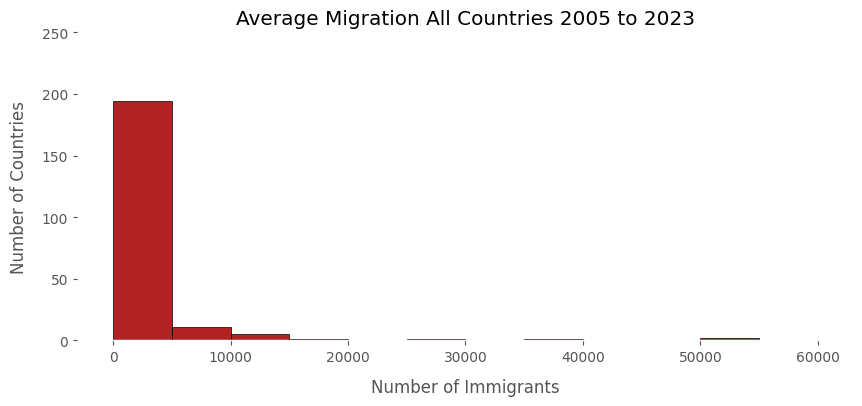

In [349]:
# Set the bins 5000 apart
bins = [0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000]

# Plot the histogram
ax = (df_migration['Average']).plot(kind='hist', 
                                    figsize=(10,4), 
                                    color = 'firebrick',
                                    bins = bins, 
                                    ec = 'k',
                                    ylim=(0,250)
                                              )
ax.set_facecolor("white")
# Add labels
plt.title('Average Migration All Countries 2005 to 2023')
plt.ylabel('Number of Countries',labelpad = 10)
plt.xlabel("Number of Immigrants",labelpad = 10);

In [351]:
df_migration[df_migration['Average']>=25000]

,Jun 2005,Jun 2006,Jun 2007,Jun 2008,Jun 2009,Jun 2010,Jun 2011,Jun 2012,Jun 2013,Jun 2014,...,Jun 2016,Jun 2017,Jun 2018,Jun 2019,Jun 2020,Jun 2021,Jun 2022,Jun 2023,Total,Average
Country,,,,,,,,,,,,,,,,,,,,,
New Zealand,32030,32770,36300,42070,38090,31580,43430,48220,41500,28440,...,24220,22660,21270,20960,15640,12000,16280,27510,558270,29382
UK,39870,45530,48650,53330,48910,42100,45750,50610,46250,37190,...,32790,33080,29740,29300,27670,9850,17500,32070,704110,37058
China,28870,30370,39540,49200,48540,49020,41210,40150,46560,53130,...,70190,77760,82320,71810,60150,9260,44300,89040,993700,52300
India,21070,27770,43660,56810,68350,36610,23760,30390,35280,45520,...,52020,60310,67440,86350,78830,11190,64380,106960,966510,50868


* Most countries (68%) contributed 500 or less migrants per year on average over the whole period 
* There are a few countries that had more than 25000 migrants on average per year - China, India, UK, New Zealand

## 3.2 The Trend in Total Migration Across the Period

In [352]:
# Calculate the average across the period in thousands
average_calc = df_migration.drop(columns = ['Total','Average'],axis = 1)
average_calc = average_calc.sum().sum()/19
print(average_calc)

417010.5263157895


In [353]:
# Get total for all countries migration by year
all_countries = df_migration.iloc[:,:-2]
all_countries_total = all_countries.sum(axis = 0)
all_countries_total = all_countries_total/1000

In [354]:
# Percentage growth
percent_growth = pd.DataFrame(all_countries_total).reset_index()
percent_growth.columns = ['Year','Migration(000s)']
percent_growth['%'] = percent_growth['Migration(000s)'].pct_change()*100
percent_growth

,Year,Migration(000s),%
0,Jun 2005,294.12,NaN
1,Jun 2006,326.40,10.975112
2,Jun 2007,384.65,17.846201
3,Jun 2008,448.28,16.542311
4,Jun 2009,463.36,3.363969
5,Jun 2010,383.44,-17.247928
6,Jun 2011,378.77,-1.217922
7,Jun 2012,416.78,10.035114
8,Jun 2013,431.30,3.483852
9,Jun 2014,418.40,-2.990958


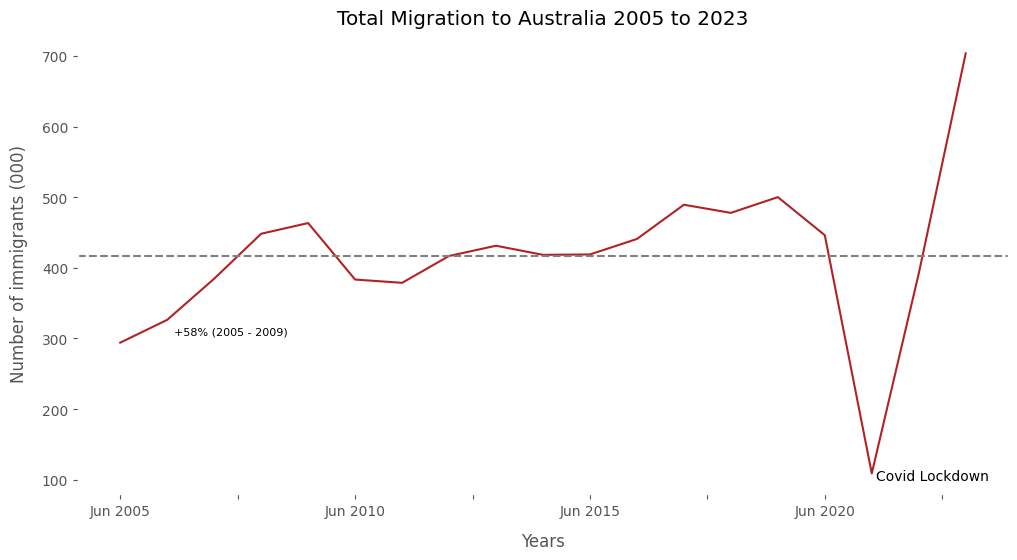

In [355]:
# Plot the migration total for all years

fig, ax = plt.subplots(figsize = (12,6))
all_countries_total.plot(color = 'firebrick',
                  title = 'Total Migration to Australia 2005 to 2023')
ax.set_facecolor('white')
plt.ylabel('Number of immigrants (000)',labelpad = 10, fontsize = 12)
plt.xlabel('Years', labelpad = 10, fontsize = 12)
ax.text(16.1, 100, 'Covid Lockdown', fontsize = 10)
plt.axhline(y = average_calc/1000, color = 'gray', linestyle = '--');
plt.text(1.15,305,"+58% (2005 - 2009)",fontsize = 8);

#### Total Migration over the Period
* We can see from the chart that migration has been relatively stable around a mean of 417,000 until the lockdown, where migration from all countries into Australia fell to 109,000. 
* Since then, there has been a recovery to 392,000 to June 2022 and jumping up to a peak of 704,000 to the year ending June 2023.
* However, if we average the last three years (2021,2022 and 2023), migration is 401,000 per year closer to the mean for the years 2005 to 2019 of 419,000.
* Overall, excluding the blips over the Covid years, migration has been relatively consistent at around 420,000 with the exception of the period of rapid growth between June 2005 and June 2009, where there was a significant increase in annual migration levels from 294,000 per year to 463,000 per year (58% growth rate). 
* This was also the period where my own family emigrated to Australia (January 2006)

## 3.3 Total Migration by Country over the Period

In [357]:
# Sort by the total column
sorted_total = df_cleaned.sort_values(by = 'Total',ascending = False)
top5 = sorted_total.head(5)
top5

,Jun 2005,Jun 2006,Jun 2007,Jun 2008,Jun 2009,Jun 2010,Jun 2011,Jun 2012,Jun 2013,Jun 2014,...,Jun 2016,Jun 2017,Jun 2018,Jun 2019,Jun 2020,Jun 2021,Jun 2022,Jun 2023,Total,Average
Country,,,,,,,,,,,,,,,,,,,,,
China,28870,30370,39540,49200,48540,49020,41210,40150,46560,53130,...,70190,77760,82320,71810,60150,9260,44300,89040,993700,52300
India,21070,27770,43660,56810,68350,36610,23760,30390,35280,45520,...,52020,60310,67440,86350,78830,11190,64380,106960,966510,50868
UK,39870,45530,48650,53330,48910,42100,45750,50610,46250,37190,...,32790,33080,29740,29300,27670,9850,17500,32070,704110,37058
New Zealand,32030,32770,36300,42070,38090,31580,43430,48220,41500,28440,...,24220,22660,21270,20960,15640,12000,16280,27510,558270,29382
Philippines,7900,10140,13150,15120,15560,12520,13240,16910,17010,15890,...,16430,17120,16370,22780,19460,3910,17360,45040,311690,16404


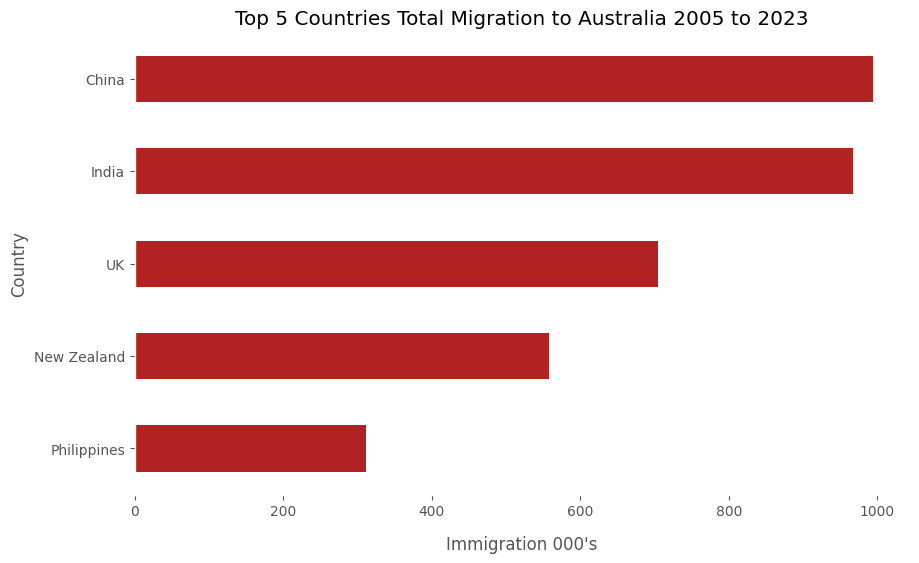

In [358]:
# Chart the top five countries
ax = (top5['Total']/1000).sort_values().plot(kind = 'barh', 
                                        figsize = (10,6), 
                                        title = 'Top 5 Countries Total Migration to Australia 2005 to 2023', 
                                        color = 'firebrick')
ax.set_facecolor("white")
plt.xlabel("Immigration 000's", labelpad = 12);

#### Total Migration by Country

* We can see that the highest total migration is from India and China, with the UK, New Zealand and the Phillipines making up the other three places

## 3.4 Top 5 Over the Period

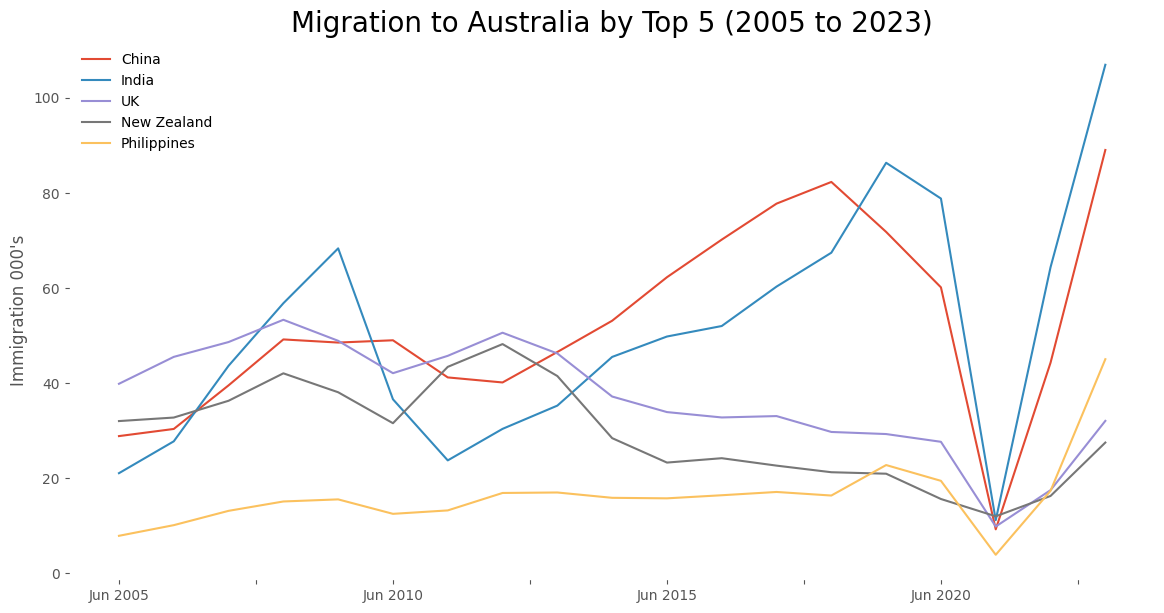

In [361]:
# Plot the movement in the top five over the period

ax = (top5.iloc[:,0:-2].T/1000).plot(kind = 'line', figsize = (14,7))
plt.title('Migration to Australia by Top 5 (2005 to 2023)', fontsize = 20)
plt.ylabel("Immigration 000's")
ax.set_facecolor('white')
plt.legend(facecolor = 'white',edgecolor = 'white')
props = dict(boxstyle='square', facecolor = 'lightgray', alpha=0.1)

#### Top 5 Countries by Total Migration over the Period

* If we look at the countries with the highest total migration over the time period we can see there is a clear trend upwards for China and India and a trend downwards for the UK and New Zealand. The Phillipines appears relatively constant over the period. 
* All countries show a drop in 2021 over the lockdown period for Covid 19

''

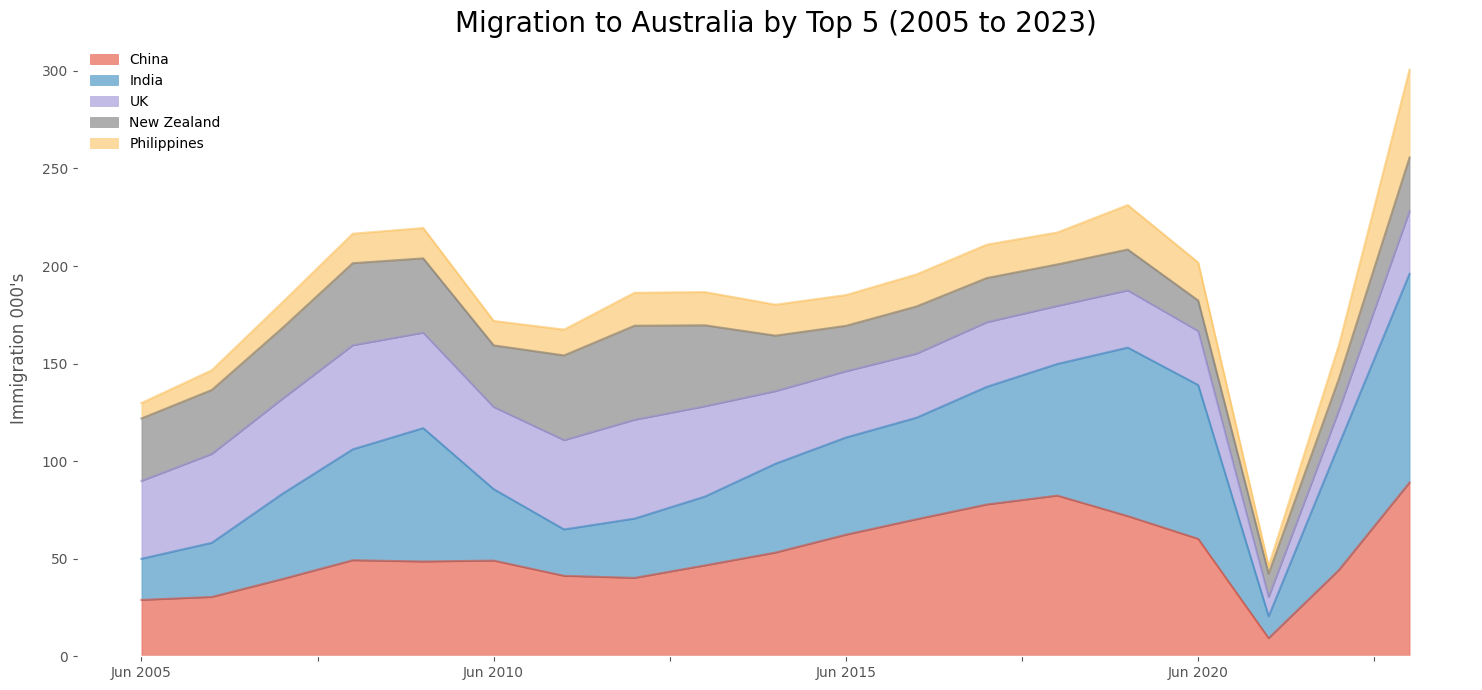

In [362]:
# Showing the data as an area chart
ax = (top5.iloc[:,0:-2].T/1000).plot(kind = 'area', alpha = 0.6,figsize = (18,8))
plt.title('Migration to Australia by Top 5 (2005 to 2023)', fontsize = 20)
plt.ylabel("Immigration 000's",labelpad = 10)
ax.set_facecolor('white')
plt.legend(facecolor = 'white', edgecolor = 'white')
;

* Looking at the area chart we can see the share of migration from China in India has been increasing significantly compared to the other countries.

## 3.5 Changes in the Top 5 Countries over the Period

In [366]:
# Display the top five for each year
for i in range(len(sorted_total.columns[0:-2])):
    top = pd.DataFrame(sorted_total.iloc[:,i].sort_values(ascending = False).head(5))
    display(top)
    

,Jun 2005
Country,
UK,39870
New Zealand,32030
China,28870
India,21070
USA,10700


,Jun 2006
Country,
UK,45530
New Zealand,32770
China,30370
India,27770
"Korea, South",13290


,Jun 2007
Country,
UK,48650
India,43660
China,39540
New Zealand,36300
"Korea, South",15500


,Jun 2008
Country,
India,56810
UK,53330
China,49200
New Zealand,42070
"Korea, South",17190


,Jun 2009
Country,
India,68350
UK,48910
China,48540
New Zealand,38090
"Korea, South",17030


,Jun 2010
Country,
China,49020
UK,42100
India,36610
New Zealand,31580
"Korea, South",14760


,Jun 2011
Country,
UK,45750
New Zealand,43430
China,41210
India,23760
"Korea, South",13850


,Jun 2012
Country,
UK,50610
New Zealand,48220
China,40150
India,30390
Philippines,16910


,Jun 2013
Country,
China,46560
UK,46250
New Zealand,41500
India,35280
Philippines,17010


,Jun 2014
Country,
China,53130
India,45520
UK,37190
New Zealand,28440
Philippines,15890


,Jun 2015
Country,
China,62280
India,49810
UK,33920
New Zealand,23300
Philippines,15780


,Jun 2016
Country,
China,70190
India,52020
UK,32790
New Zealand,24220
Malaysia,19260


,Jun 2017
Country,
China,77760
India,60310
UK,33080
New Zealand,22660
Malaysia,20140


,Jun 2018
Country,
China,82320
India,67440
UK,29740
Nepal,22070
New Zealand,21270


,Jun 2019
Country,
India,86350
China,71810
UK,29300
Nepal,25470
Philippines,22780


,Jun 2020
Country,
India,78830
China,60150
UK,27670
Philippines,19460
Nepal,15910


,Jun 2021
Country,
New Zealand,12000
India,11190
UK,9850
China,9260
USA,4650


,Jun 2022
Country,
India,64380
China,44300
Nepal,23630
UK,17500
Philippines,17360


,Jun 2023
Country,
India,106960
China,89040
Philippines,45040
UK,32070
Nepal,29300


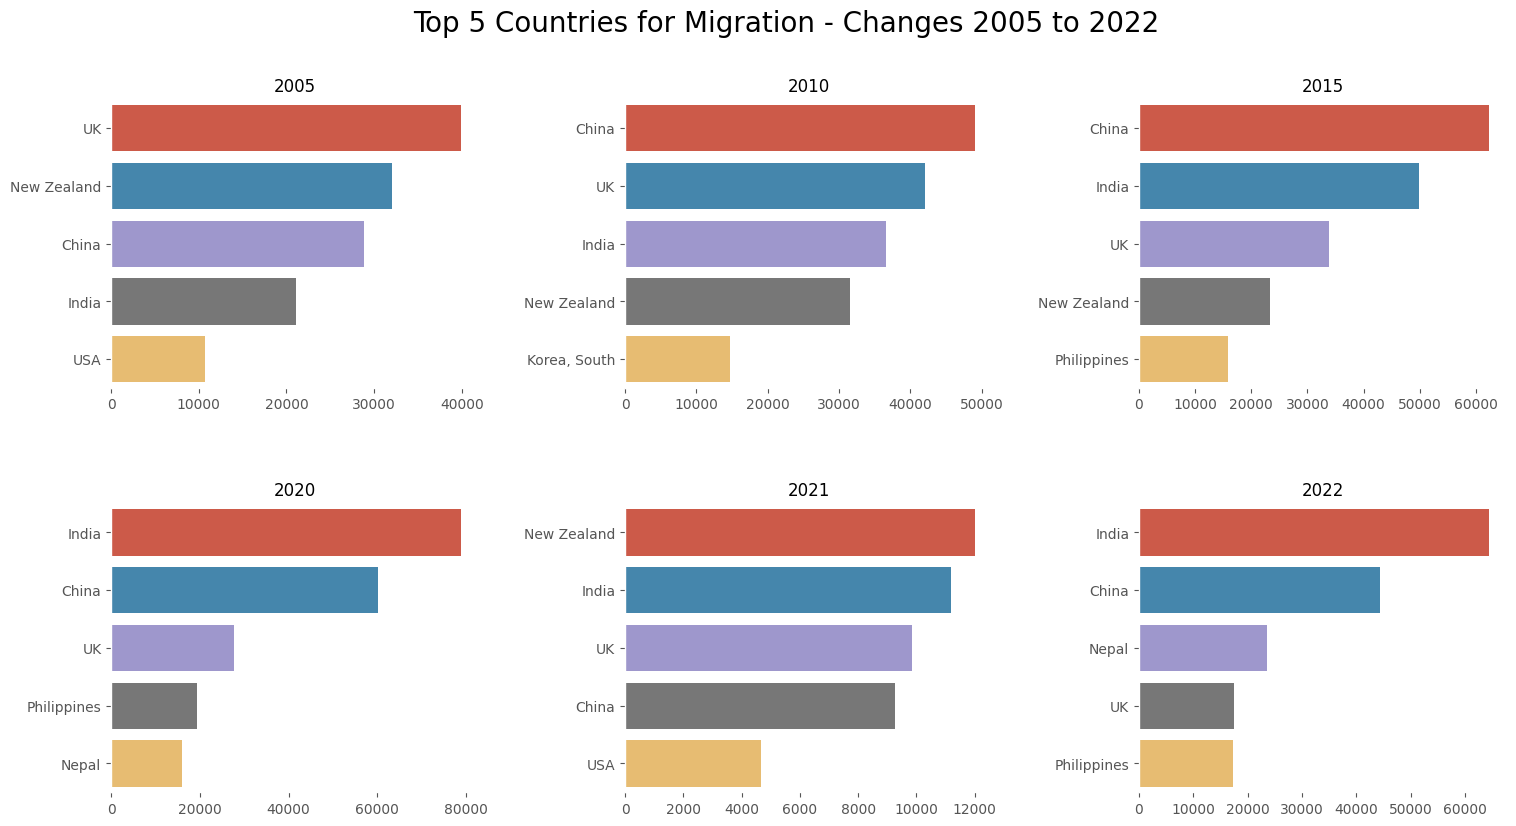

In [367]:
# We can show some of these movements by showing bar charts of the top five in 2005, 2010, 2015, 2020, 2021, 2022

# Split off the data we need into separate dataframes by years at 5 year periods
df2005 = pd.DataFrame(sorted_total.iloc[:,0].sort_values(ascending = False).head(5))
df2010 = pd.DataFrame(sorted_total.iloc[:,5].sort_values(ascending = False).head(5))
df2015 = pd.DataFrame(sorted_total.iloc[:,10].sort_values(ascending = False).head(5))
df2020 = pd.DataFrame(sorted_total.iloc[:,15].sort_values(ascending = False).head(5))
df2021 = pd.DataFrame(sorted_total.iloc[:,16].sort_values(ascending = False).head(5))
df2022 = pd.DataFrame(sorted_total.iloc[:,17].sort_values(ascending = False).head(5))

# Set the figure details
fig, axs = plt.subplots(nrows = 2,ncols = 3, figsize = (18,9))
fig.suptitle("Top 5 Countries for Migration - Changes 2005 to 2022", fontsize=20)
plt.subplots_adjust(wspace=0.4,hspace = 0.4)

# Plot barplots
a = sns.barplot(y=df2005.index, x="Jun 2005", data=df2005, ax = axs[0,0])
b = sns.barplot(y=df2010.index, x="Jun 2010", data=df2010, ax = axs[0,1])
c = sns.barplot(y=df2015.index, x="Jun 2015", data=df2015, ax = axs[0,2])
d = sns.barplot(y=df2020.index, x="Jun 2020", data=df2020, ax = axs[1,0])
e = sns.barplot(y=df2021.index, x="Jun 2021", data=df2021, ax = axs[1,1])
f = sns.barplot(y=df2022.index, x="Jun 2022", data=df2022, ax = axs[1,2])

plots = [a,b,c,d,e,f]

# Cycle over the plots and remove axis labels and set facecolour
for p in plots:
    p.set(xlabel = None)
    p.set(ylabel = None)
    p.set_facecolor('white')
    
# Add titles to the plots
axs[0,0].set_title("2005", fontsize = 12) 
axs[0,1].set_title("2010", fontsize = 12) 
axs[0,2].set_title("2015", fontsize = 12) 
axs[1,0].set_title("2020", fontsize = 12) 
axs[1,1].set_title("2021", fontsize = 12)
axs[1,2].set_title("2022", fontsize = 12);


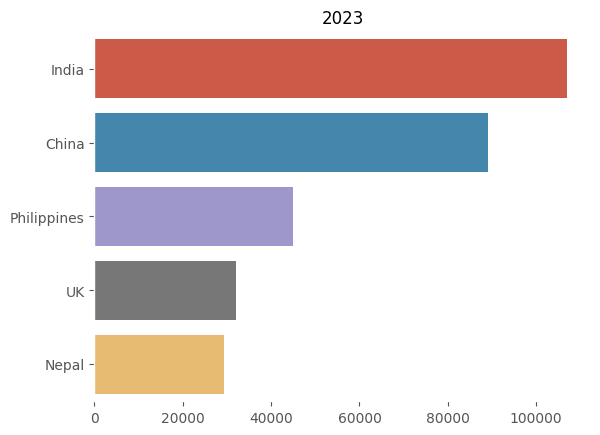

In [368]:
# Plot for 2023
df2023 = pd.DataFrame(sorted_total.iloc[:,18].sort_values(ascending = False).head(5))
ax = sns.barplot(y=df2023.index, x="Jun 2023", data=df2023)
ax.set(xlabel = None)
ax.set(ylabel = None)
ax.set_facecolor('white')
ax.set_title("2023", fontsize = 12);

#### Changes in the Top 5 Countries over the Period

* Sorting the top five countries for each year, we can see some interesting movements in the dataframes. 
* In 2005, we have the USA in the top 5. From 2006 to 2011, they are replaced by South Korea and then in 2012 to 2015, the Phillipines takes the fifth spot. 
* In 2016 and 2017, this place is taken by Malaysia and in 2018 Nepal enters the table at fourth spot. 
* In 2019, New Zealand is knocked out of the top 5 and doesn't return until the year ending June 2021 where it takes top position. During Covid, migration was significantly disrupted but New Zealanders have free movement to Australia, through a reciprocal arrangement and this might represent Australians returning home. 
* The USA also reappears in this year, possibly for the same reason. In the year ending June 2023, the top five shows a very different pattern to the top five at the start of the period.

## 3.6  Trend Analysis of the Top Migration Countries Over the Period

In [377]:
# Split out China and India and the UK and New Zealand
china_india = top5[(top5.index == 'China') | (top5.index == 'India')].T.reset_index()
uk_newzeal = top5[(top5.index == 'New Zealand') | (top5.index == 'UK')].T.reset_index()

# Drop the index column
china_india.drop(columns = ['index'],axis = 1,inplace = True)
uk_newzeal.drop(columns = ['index'],axis = 1,inplace = True)

In [379]:
# Create a new date index
dates = []
for i in range(2005,2024):
    dates.append(i)
dates = pd.DataFrame(dates)

In [382]:
# Concat the dates to the dataframes
new_china_india = pd.concat([dates,china_india],axis = 1).set_index(0)
new_uk_newzeal = pd.concat([dates,uk_newzeal],axis = 1).set_index(0)

# Remove index name
new_china_india.index.name = None
new_uk_newzeal.index.name = None

# Drop the last two row which are total and average
new_china_india2 = new_china_india.iloc[0:-2,:]
new_uk_newzeal2 = new_uk_newzeal.iloc[0:-2,:]

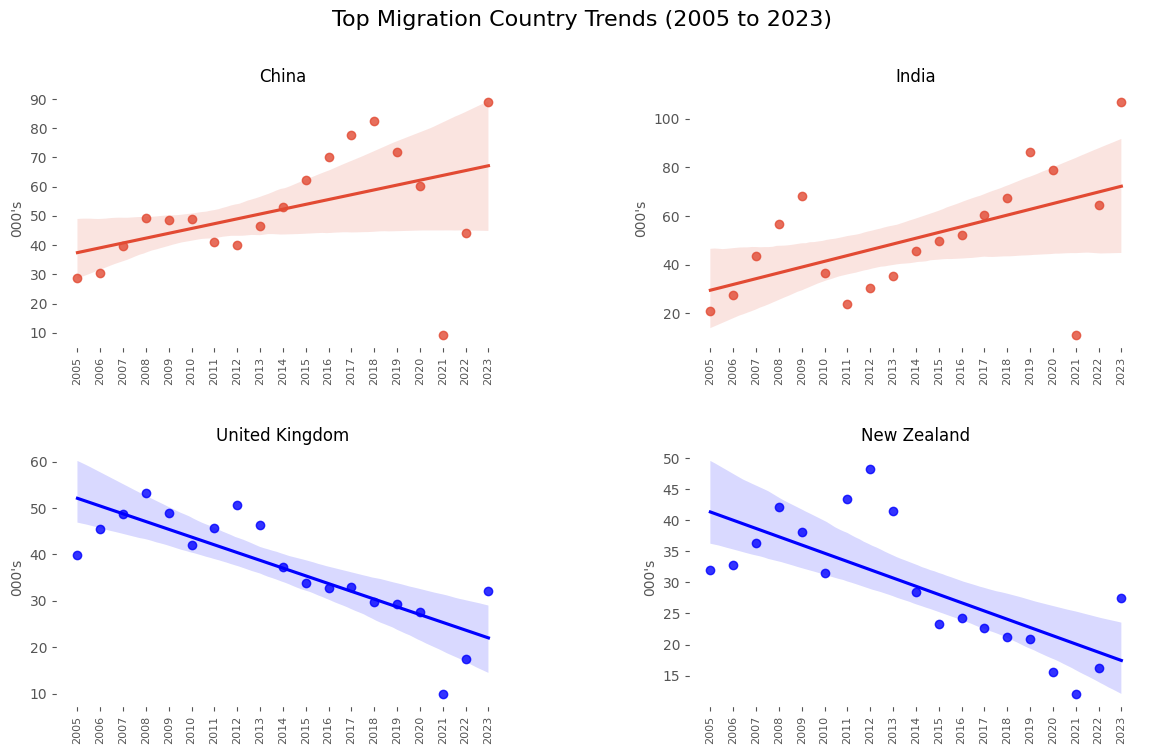

In [383]:
# Set Xtick labels
labs = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019',
        '2020','2021','2022','2023']

# Set the figure details
fig, axs = plt.subplots(nrows = 2,ncols = 2, figsize = (14,8))
fig.suptitle("Top Migration Country Trends (2005 to 2023)", fontsize=16)

# Plot a regplot to show the trend and the separate datapoints
# India and China
a = sns.regplot(x=new_china_india2.index, y="China", data=new_china_india2/1000, ax = axs[0,0])
b = sns.regplot(x=new_china_india2.index, y="India", data=new_china_india2/1000, ax = axs[0,1])

# UK and New Zealand
c = sns.regplot(x=new_uk_newzeal2.index, y="UK", data=new_uk_newzeal2/1000, ax = axs[1,0],color = 'blue')
d = sns.regplot(x=new_uk_newzeal2.index, y="New Zealand", data=new_uk_newzeal2/1000, ax = axs[1,1],color = 'blue')

plots2 = [a,b,c,d]

# Cycle over the plots and set ylabels and facecolor
for p in plots2:
    p.set_ylabel("000's", fontsize = 10)
    p.set_facecolor('white')
    
# Set the titles
axs[0,0].set_title("China", fontsize = 12) 
axs[0,1].set_title("India", fontsize = 12) 
axs[1,0].set_title("United Kingdom", fontsize = 12) 
axs[1,1].set_title("New Zealand", fontsize = 12) 

# Set the Xticks
axs[0,0].set_xticks(new_china_india2.index,labs,rotation=90, fontsize = 8)
axs[0,1].set_xticks(new_china_india2.index,labs,rotation=90, fontsize = 8)
axs[1,0].set_xticks(new_uk_newzeal2.index,labs,rotation=90, fontsize = 8)
axs[1,1].set_xticks(new_uk_newzeal2.index,labs,rotation=90, fontsize = 8)

# Adjust spacing between plots
plt.subplots_adjust(wspace=0.4,hspace = 0.4)

In [386]:
#calculate slope and intercept of regression equation
import scipy

for i in [a,b,c,d]:
    slope, intercept, r, p, sterr = scipy.stats.linregress(x=i.get_lines()[0].get_xdata(),
                                                       y=i.get_lines()[0].get_ydata())
    print(intercept,slope)

-3275.0753333333396 1.652122807017547
-4724.36038596494 2.371017543859664
3405.9857543860358 -1.6727543859649479
2702.9852982456578 -1.3275087719298466


We can see that the slope of the lines for China, India, UK and New Zealand respectively show a greater value for India than China which has an increase similar in rate to the decrease for the UK

#### Trends in the Top Countries for Immigration over the Period

* We can clearly see the trends here over the period with migration from the UK and New Zealand reducing while migration from China and India is upwards

## 3.7 Comparison Over Time for China, India, UK and New Zealand

In [387]:
# Reset index and set the type of year to a string for both subsets

# China and India
new_china_india2_reset = new_china_india2.reset_index()
new_china_india2_reset.columns = ['Year','China','India']
new_china_india2_reset['Year'] = new_china_india2_reset['Year'].astype('int').astype('object')
display(new_china_india2_reset.head())

# UK and New Zealand
new_uk_newzeal2_reset = new_uk_newzeal2.reset_index()
new_uk_newzeal2_reset.columns = ['Year','UK','New Zealand']
new_uk_newzeal2_reset['Year'] = new_uk_newzeal2_reset['Year'].astype('int').astype('object')
display(new_uk_newzeal2_reset.head())

,Year,China,India
0,2005,28870,21070
1,2006,30370,27770
2,2007,39540,43660
3,2008,49200,56810
4,2009,48540,68350


,Year,UK,New Zealand
0,2005,39870,32030
1,2006,45530,32770
2,2007,48650,36300
3,2008,53330,42070
4,2009,48910,38090


In [388]:
new_china_india2.median()

China    49020.0
India    49810.0
dtype: float64

In [389]:
# Melt the dataframes

melted_india_china = pd.melt(new_china_india2_reset, id_vars = ['Year'], 
                             value_vars = ['China','India'], 
                             var_name = 'Country',
                             value_name = 'Migration').sort_values(by = 'Year')

melted_uk_nz = pd.melt(new_uk_newzeal2_reset, id_vars = ['Year'], 
                             value_vars = ['UK','New Zealand'], 
                             var_name = 'Country',
                             value_name = 'Migration').sort_values(by = 'Year')

''

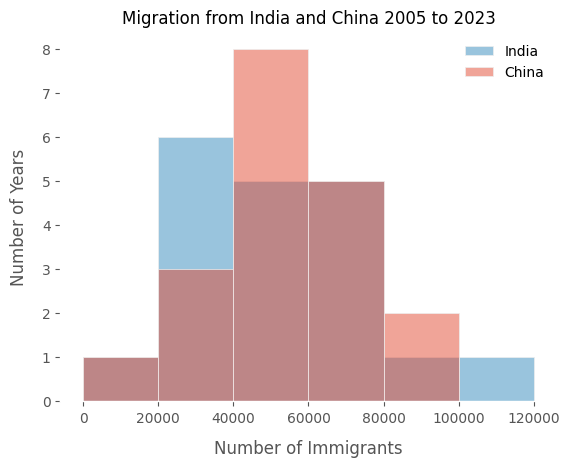

In [390]:
# Plot a histogram with both countries on it
l = ['India','China']
bins = [0,20000,40000,60000,80000,100000,120000]
ax = sns.histplot(melted_india_china, x = 'Migration', hue = 'Country', bins = bins)
plt.title('Migration from India and China 2005 to 2023',fontsize = 12)
plt.ylabel("Number of Years",labelpad = 10)
plt.xlabel("Number of Immigrants",labelpad = 10)
ax.set_facecolor("white")
plt.legend(labels = l,loc='upper right', facecolor = 'white', edgecolor = 'white')
;

''

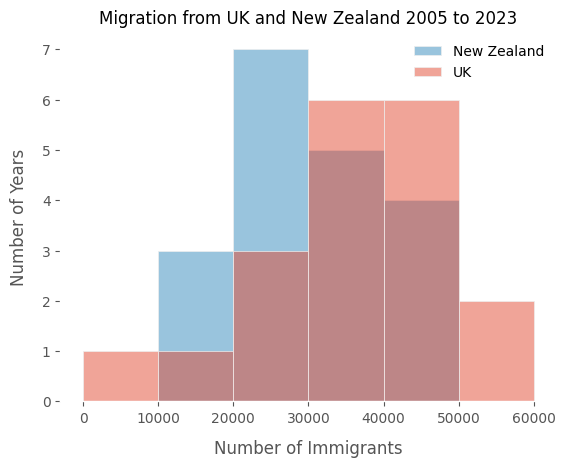

In [391]:
# Plot a histogram with both countries on it
bins = [0,10000,20000,30000,40000,50000,60000]
l2 = ['New Zealand','UK']
ax = sns.histplot(melted_uk_nz, x = 'Migration', hue = 'Country', bins = bins)
plt.title('Migration from UK and New Zealand 2005 to 2023',fontsize = 12)
plt.ylabel("Number of Years",labelpad = 10)
plt.xlabel("Number of Immigrants",labelpad = 10)
ax.set_facecolor("white")
plt.legend(labels = l2,loc='upper right', facecolor = 'white', edgecolor = 'white')
;

In [392]:
all_four = pd.concat([new_china_india2, new_uk_newzeal2],axis = 1)
all_four

,China,India,UK,New Zealand
2005.0,28870,21070,39870,32030
2006.0,30370,27770,45530,32770
2007.0,39540,43660,48650,36300
2008.0,49200,56810,53330,42070
2009.0,48540,68350,48910,38090
2010.0,49020,36610,42100,31580
2011.0,41210,23760,45750,43430
2012.0,40150,30390,50610,48220
2013.0,46560,35280,46250,41500
2014.0,53130,45520,37190,28440


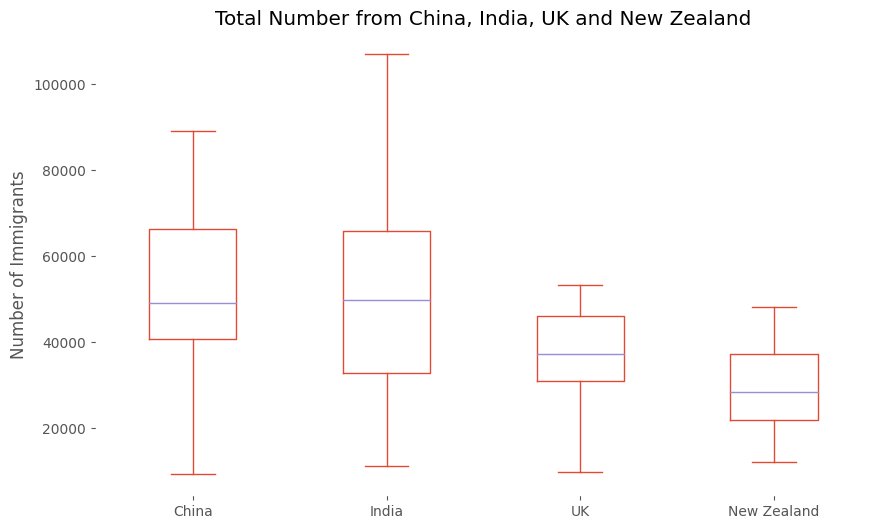

In [393]:
# Boxplots to compare the different countries migration
ax = all_four.plot(kind = 'box',
              figsize = (10,6),
              title = 'Total Number from China, India, UK and New Zealand',
              ylabel = 'Number of Immigrants')
ax.set_facecolor('white');

## 3.8 Comparison by decade all countries

In [394]:
# Get figures by decade
y_2005 = pd.DataFrame(sorted_total.iloc[:,0])
y_2010 = pd.DataFrame(sorted_total.iloc[:,5])
y_2015 = pd.DataFrame(sorted_total.iloc[:,10])
y_2020 = pd.DataFrame(sorted_total.iloc[:,15])
y_2023 = pd.DataFrame(sorted_total.iloc[:,18])

all_years = pd.concat([y_2005,y_2010,y_2015, y_2020,y_2023],axis = 1)

In [395]:
# Get basic statistics
all_years.describe()

,Jun 2005,Jun 2010,Jun 2015,Jun 2020,Jun 2023
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,1368.000000,1783.441860,1948.558140,2075.348837,3272.372093
std,4497.470338,5820.706212,6465.313724,7433.204158,10932.463509
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,20.000000,20.000000,30.000000,30.000000
50%,120.000000,150.000000,130.000000,140.000000,160.000000
75%,645.000000,780.000000,830.000000,1025.000000,1700.000000
max,39870.000000,49020.000000,62280.000000,78830.000000,106960.000000


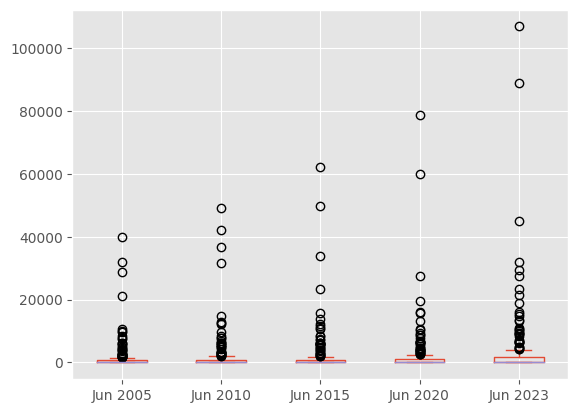

In [396]:
all_years.plot(kind = 'box');

Due to the outliers, it is difficult to see the spread of the other countries. We could do a log transform or there is a parameter in the seaborn function to set the whiskers parameter and showfliers = False.

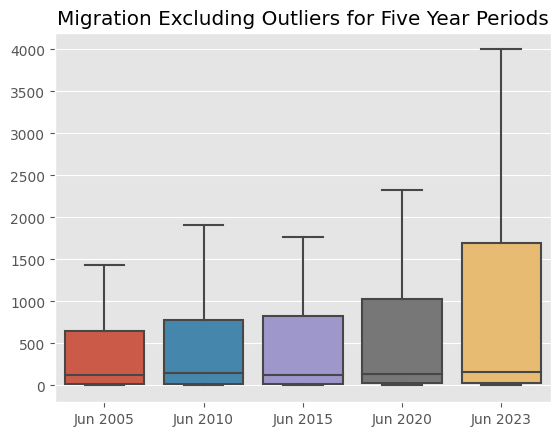

In [397]:
sns.boxplot(data = all_years,showfliers = False)
plt.title('Migration Excluding Outliers for Five Year Periods');

There is no significant difference between the decades to report

## 3.9 Immigration in relation to Population and GDP

For this part of the analysis, we are going to bring in two more tables of data, relating to population and gdp, also from the World Bank. We will need to do some further cleaning to get the data into a more useable format before being able to combine these three features to create some more charts.

In [493]:
# Add a total migration column and an average column to our original cleaned dataframe
df_average = df_cleaned.copy()

# Drop those with zero migration
df_non_zero = df_average[df_average['Average']!=0]

df_average.head(2)

,Jun 2005,Jun 2006,Jun 2007,Jun 2008,Jun 2009,Jun 2010,Jun 2011,Jun 2012,Jun 2013,Jun 2014,...,Jun 2016,Jun 2017,Jun 2018,Jun 2019,Jun 2020,Jun 2021,Jun 2022,Jun 2023,Total,Average
Country,,,,,,,,,,,,,,,,,,,,,
Norfolk Island(g),30,30,40,40,30,30,30,30,40,30,...,70,80,10,10,0,0,0,10,530,27
New Zealand,32030,32770,36300,42070,38090,31580,43430,48220,41500,28440,...,24220,22660,21270,20960,15640,12000,16280,27510,558270,29382


In [494]:
# Load data on population and GDP
pop = pd.read_excel('C:/Users/imoge/Projects/Datasets/WorldBankPopulationconverted.xlsx',skiprows = 3)
gdp = pd.read_excel('C:/Users/imoge/Projects/Datasets/WorldBankGDPconverted.xlsx',skiprows = 3)

In [495]:
# Show head and tail for each dataset
display(pop.head(2))
display(pop.tail(2))
display(gdp.head(2))
display(gdp.tail(2))

print(pop.shape, gdp.shape)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,NaN
265,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3806310.0,3925952.0,4049778.0,4177931.0,4310332.0,4447149.0,...,13855753.0,14154937.0,14452704.0,14751101.0,15052184.0,15354608.0,15669666.0,15993524.0,16320537.0,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.847810e+10,1.936631e+10,2.050647e+10,2.224273e+10,2.429433e+10,2.661956e+10,...,1.006992e+12,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.811064e+10,2.209642e+10,2.916378e+10,NaN
265,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1.052990e+09,1.096647e+09,1.117602e+09,1.159512e+09,1.217138e+09,1.311436e+09,...,1.949552e+10,1.996312e+10,2.054868e+10,1.758489e+10,3.415607e+10,2.183223e+10,2.150970e+10,2.837124e+10,2.736663e+10,NaN


(266, 68) (266, 68)


In [496]:
# Get the columns from 2005 onwards (2023 missing)
pop_filtered = pop.iloc[:,49:-1]
gdp_filtered = gdp.iloc[:,49:-1]

# Get the index from the previous dataframe
ind1 = pop['Country Name']
ind2 = gdp['Country Name']

# Set this as the index for the new dataframe
pop_filtered.index = ind1
gdp_filtered.index = ind2

# Display the filtered dataframes
display(pop_filtered.head(2))
display(gdp_filtered.head(2))

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,
Aruba,94483.0,95606.0,96787.0,97996.0,99212.0,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
Africa Eastern and Southern,457153837.0,469508516.0,482406426.0,495748900.0,509410477.0,523459657.0,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,
Aruba,2.360017e+09,2.469783e+09,2.677641e+09,2.843025e+09,2.553793e+09,2.453597e+09,2.637859e+09,2.615208e+09,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09
Africa Eastern and Southern,5.149271e+11,5.786333e+11,6.640994e+11,7.118005e+11,7.235125e+11,8.670409e+11,9.716675e+11,9.799969e+11,9.863429e+11,1.006992e+12,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12


In [497]:
# Check the shapes
print(pop_filtered.shape)
print(gdp_filtered.shape)

(266, 18)
(266, 18)


In [498]:
# Check the datatypes
pop_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, Aruba to Zimbabwe
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2005    265 non-null    float64
 1   2006    265 non-null    float64
 2   2007    265 non-null    float64
 3   2008    265 non-null    float64
 4   2009    265 non-null    float64
 5   2010    265 non-null    float64
 6   2011    265 non-null    float64
 7   2012    265 non-null    float64
 8   2013    265 non-null    float64
 9   2014    265 non-null    float64
 10  2015    265 non-null    float64
 11  2016    265 non-null    float64
 12  2017    265 non-null    float64
 13  2018    265 non-null    float64
 14  2019    265 non-null    float64
 15  2020    265 non-null    float64
 16  2021    265 non-null    float64
 17  2022    265 non-null    float64
dtypes: float64(18)
memory usage: 39.5+ KB


In [499]:
gdp_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, Aruba to Zimbabwe
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2005    254 non-null    float64
 1   2006    255 non-null    float64
 2   2007    255 non-null    float64
 3   2008    256 non-null    float64
 4   2009    256 non-null    float64
 5   2010    257 non-null    float64
 6   2011    260 non-null    float64
 7   2012    258 non-null    float64
 8   2013    259 non-null    float64
 9   2014    260 non-null    float64
 10  2015    258 non-null    float64
 11  2016    258 non-null    float64
 12  2017    258 non-null    float64
 13  2018    258 non-null    float64
 14  2019    258 non-null    float64
 15  2020    257 non-null    float64
 16  2021    255 non-null    float64
 17  2022    242 non-null    float64
dtypes: float64(18)
memory usage: 39.5+ KB


In [500]:
# Check the missing values in the gdp dataframe for the last few years
gdp_filtered.isnull().sum().tail(20)

2005    12
2006    11
2007    11
2008    10
2009    10
2010     9
2011     6
2012     8
2013     7
2014     6
2015     8
2016     8
2017     8
2018     8
2019     8
2020     9
2021    11
2022    24
dtype: int64

* Because we have 2023 missing for both figures, we are going to calculate an average population figure for each country over the period and an average gdp and compare this to an average migration figure in our chart.
* We also have some missing figures in the GDP which we will need to take account of

In [501]:
# Add a total column to the population and gdp dataframes
pop_filtered['Total'] = pop_filtered.sum(axis=1)
gdp_filtered['Total'] = gdp_filtered.sum(axis = 1)

# Display results
display(pop_filtered.head(2))
display(gdp_filtered.head(2))

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
Country Name,,,,,,,,,,,,,,,,,,,
Aruba,94483.0,95606.0,96787.0,97996.0,99212.0,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,1.840840e+06
Africa Eastern and Southern,457153837.0,469508516.0,482406426.0,495748900.0,509410477.0,523459657.0,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,1.045464e+10


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
Country Name,,,,,,,,,,,,,,,,,,,
Aruba,2.360017e+09,2.469783e+09,2.677641e+09,2.843025e+09,2.553793e+09,2.453597e+09,2.637859e+09,2.615208e+09,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,5.104738e+10
Africa Eastern and Southern,5.149271e+11,5.786333e+11,6.640994e+11,7.118005e+11,7.235125e+11,8.670409e+11,9.716675e+11,9.799969e+11,9.863429e+11,1.006992e+12,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12,1.607523e+13


In [502]:
# Sort by total population to find the regional and country group totals we need to remove as they are not countries
pop_sorted = pop_filtered.sort_values(by = 'Total',ascending = False)
list_to_remove = pop_sorted.head(45).index # Found by trying different values for head parameter
list_to_remove

Index(['World', 'IDA & IBRD total', 'Low & middle income', 'Middle income',
       'IBRD only', 'Early-demographic dividend', 'Lower middle income',
       'Upper middle income', 'East Asia & Pacific',
       'Late-demographic dividend',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'South Asia',
       'South Asia (IDA & IBRD)', 'IDA total', 'China', 'OECD members',
       'India', 'High income', 'Post-demographic dividend', 'IDA only',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (IDA & IBRD countries)',
       'Sub-Saharan Africa (excluding high income)',
       'Least developed countries: UN classification', 'Europe & Central Asia',
       'Fragile and conflict affected situations', 'Pre-demographic dividend',
       'Heavily indebted poor countries (HIPC)', 'Latin America & Caribbean',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Africa Eastern and Southern', 'Low income',
       'Latin Amer

* We can see that there are a couple of country names in here - China and India but the rest are groups that we need to remove. 
* We will then use this list to remove these same groups from the GDP dataframe

In [503]:
# Convert these regional entries to a list
l = pop_sorted.head(45).index.tolist()
exclude = ['China','India']

# Drop India and China from this list as we want to keep them in our data
l2 = [word for word in l if word not in exclude]

# Filter to get entries in our population dataframe that just contain country names
pop_filtered2 = pop_sorted[~pop_sorted.index.isin(l2)]

# Apply the filter list to GDP dataframe also
gdp_filtered2 = gdp_filtered[~gdp_filtered.index.isin (l2)].sort_values(by = 'Total', ascending = False)
gdp_filtered2.head(3)

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
Country Name,,,,,,,,,,,,,,,,,,,
United States,1.303920e+13,1.381559e+13,1.447423e+13,1.476986e+13,1.447806e+13,1.504896e+13,1.559973e+13,1.625397e+13,1.684319e+13,1.755068e+13,1.820602e+13,1.869511e+13,1.947734e+13,2.053306e+13,2.138098e+13,2.106047e+13,2.331508e+13,2.543970e+13,3.199812e+14
China,2.285961e+12,2.752119e+12,3.550328e+12,4.594337e+12,5.101691e+12,6.087192e+12,7.551546e+12,8.532185e+12,9.570471e+12,1.047562e+13,1.106157e+13,1.123331e+13,1.231049e+13,1.389491e+13,1.427997e+13,1.468774e+13,1.782046e+13,1.796317e+13,1.737531e+14
Japan,4.831467e+12,4.601663e+12,4.579751e+12,5.106679e+12,5.289493e+12,5.759072e+12,6.233147e+12,6.272363e+12,5.212328e+12,4.896994e+12,4.444931e+12,5.003678e+12,4.930837e+12,5.040881e+12,5.117994e+12,5.055587e+12,5.034621e+12,4.256411e+12,9.166790e+13


In [504]:
# Now calculate an average population  and an average gdp column (excluding the total column)
pop_filtered2['Average_Pop'] = pop_filtered2['Total']/len(pop_filtered2.columns)-1
gdp_filtered2['Average_GDP'] = gdp_filtered2['Total']/len(pop_filtered2.columns)-1

display(pop_filtered2.head(2))
display(gdp_filtered2.head(2))

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total,Average_Pop
Country Name,,,,,,,,,,,,,,,,,,,,
China,1.303720e+09,1.311020e+09,1.317885e+09,1.324655e+09,1.331260e+09,1.337705e+09,1.345035e+09,1.354190e+09,1.363240e+09,1.371860e+09,1.379860e+09,1.387790e+09,1.396215e+09,1.402760e+09,1.407745e+09,1.411100e+09,1.412360e+09,1.412175e+09,2.457058e+10,1.293188e+09
India,1.154639e+09,1.172374e+09,1.189692e+09,1.206735e+09,1.223640e+09,1.240614e+09,1.257621e+09,1.274487e+09,1.291132e+09,1.307247e+09,1.322867e+09,1.338636e+09,1.354196e+09,1.369003e+09,1.383112e+09,1.396387e+09,1.407564e+09,1.417173e+09,2.330712e+10,1.226690e+09


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total,Average_GDP
Country Name,,,,,,,,,,,,,,,,,,,,
United States,1.303920e+13,1.381559e+13,1.447423e+13,1.476986e+13,1.447806e+13,1.504896e+13,1.559973e+13,1.625397e+13,1.684319e+13,1.755068e+13,1.820602e+13,1.869511e+13,1.947734e+13,2.053306e+13,2.138098e+13,2.106047e+13,2.331508e+13,2.543970e+13,3.199812e+14,1.599906e+13
China,2.285961e+12,2.752119e+12,3.550328e+12,4.594337e+12,5.101691e+12,6.087192e+12,7.551546e+12,8.532185e+12,9.570471e+12,1.047562e+13,1.106157e+13,1.123331e+13,1.231049e+13,1.389491e+13,1.427997e+13,1.468774e+13,1.782046e+13,1.796317e+13,1.737531e+14,8.687654e+12


In [505]:
# Reset index, select the average from migration dataframe, rename columns for consistency with other tables and drop zero values for migration
migration_average = df_cleaned[['Average']].reset_index()
migration_average.columns = ['Country','Average_Mig']
migration_average = migration_average[migration_average['Average_Mig']>0]

# Reset index for other two dataframes
pop_average = pop_filtered2[['Average_Pop']].reset_index()
gdp_average = gdp_filtered2[['Average_GDP']].reset_index()

# Display all the dataframes
display(migration_average.head())
display(pop_average.head())
display(gdp_average.head())

# Check the shape of the dataframes
print(migration_average.shape)
print(pop_average.shape)
print(gdp_average.shape)

,Country,Average_Mig
0,Norfolk Island(g),27
1,New Zealand,29382
2,New Caledonia,142
3,PNG,1443
4,Solomon Islands,441


,Country Name,Average_Pop
0,China,1.293188e+09
1,India,1.226690e+09
2,United States,2.997979e+08
3,Indonesia,2.404435e+08
4,Pakistan,1.946103e+08


,Country Name,Average_GDP
0,United States,1.599906e+13
1,China,8.687654e+12
2,Japan,4.583395e+12
3,Germany,3.267665e+12
4,United Kingdom,2.516931e+12


(215, 2)
(223, 2)
(223, 2)


* We will merge the tables on matches in country name. 
* We are using a left join as we want to see where we are missing values

In [506]:
# Clean up the text first to make sure we don't have any blanks
pop_average['Country Name'].str.strip()
gdp_average['Country Name'].str.strip()
migration_average['Country'].str.strip()

# Merge the population with the migration table to create one new table with the data we want
merged_pop_migration_gdp = migration_average.merge(pop_average, 
                                                   left_on='Country', 
                                                   right_on='Country Name', 
                                                   how = 'left').merge(gdp_average,
                                                                       left_on='Country',
                                                                       right_on='Country Name', 
                                                                       how = 'left')
merged_pop_migration_gdp.head()

,Country,Average_Mig,Country Name_x,Average_Pop,Country Name_y,Average_GDP
0,Norfolk Island(g),27,NaN,NaN,NaN,NaN
1,New Zealand,29382,New Zealand,4.344667e+06,New Zealand,1.607925e+11
2,New Caledonia,142,New Caledonia,2.449643e+05,New Caledonia,8.256465e+09
3,PNG,1443,NaN,NaN,NaN,NaN
4,Solomon Islands,441,Solomon Islands,5.635748e+05,Solomon Islands,1.066076e+09


In [507]:
# Check the info
merged_pop_migration_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         215 non-null    object 
 1   Average_Mig     215 non-null    int64  
 2   Country Name_x  163 non-null    object 
 3   Average_Pop     163 non-null    float64
 4   Country Name_y  163 non-null    object 
 5   Average_GDP     163 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.8+ KB


In [508]:
# How many are missing from the table?
merged_pop_migration_gdp[pd.isnull(merged_pop_migration_gdp).any(axis=1)].shape

(52, 6)

* We can see which ones are missing, sorted by average migration descending and then only look at those with at least 100 people as an average

In [511]:
# Which ones are missing? Sorted by average migration and with levels greater than 100
missing = merged_pop_migration_gdp[pd.isnull(merged_pop_migration_gdp).any(axis=1)].sort_values(by = 'Average_Mig',ascending = False)                         
missing[missing['Average_Mig']>=100]

,Country,Average_Mig,Country Name_x,Average_Pop,Country Name_y,Average_GDP
23,UK,37058,NaN,NaN,NaN,NaN
108,"Korea, South",11877,NaN,NaN,NaN,NaN
127,USA,11226,NaN,NaN,NaN,NaN
94,Vietnam,10317,NaN,NaN,NaN,NaN
105,Taiwan,7139,NaN,NaN,NaN,NaN
102,Hong Kong,5903,NaN,NaN,NaN,NaN
77,Iran,3591,NaN,NaN,NaN,NaN
86,Syria,1513,NaN,NaN,NaN,NaN
3,PNG,1443,NaN,NaN,NaN,NaN
87,Turkey,1438,NaN,NaN,NaN,NaN


* Some of these will just be countries spelt or entered differently in the two dataframes. 
* We will add in some population and gdp figures on some of these by referencing back to the spreadsheet of population.

In [512]:
# Fix up the migration table matching the country names to our migration table for the population and gdp dataframes

list_names = [pop_average,gdp_average]

for i in list_names:
    i['Country Name'].replace({'United Kingdom': 'UK', 
                               'Korea, Rep.': 'Korea, South',
                                'United States': 'USA',
                                'Viet Nam':'Vietnam',
                                'Hong Kong SAR, China':'Hong Kong',
                                'Iran, Islamic Rep.':'Iran',
                                'Syrian Arab Republic':'Syria',
                                'Papua New Guinea': 'PNG',
                                'Turkiye':'Turkey',
                                'Egypt, Arab Rep.': 'Egypt',
                                'Russian Federation':'Russia',
                                'United Arab Emirates':'Unit Arab Emir',
                                'Venezuela, RB': 'Venezuela',
                                'Congo, Dem. Rep.': 'Congo, Dem Rep',
                                'Bosnia and Herzegovina':'Bosnia/Herzegov',
                                'Lao PDR':'Laos',
                                'Slovak Republic':'Slovakia',
                                'Brunei Darussalam': 'Brunei',
                                'Macao SAR, China': 'Macau',
                                 }, inplace=True)


In [513]:
# Merge the population with the migration table again
merged_pop_migration_gdp = migration_average.merge(pop_average, left_on='Country', right_on='Country Name', how = 'left').merge(gdp_average,left_on='Country',right_on='Country Name', how = 'left')

# How many are missing?
merged_pop_migration_gdp[pd.isnull(merged_pop_migration_gdp).any(axis=1)].shape

(33, 6)

In [515]:
# Drop the Country Name column
merged_pop_migration_gdp.drop(['Country Name_x','Country Name_y'], axis = 1, inplace = True)

In [516]:
# Look at the table
merged_pop_migration_gdp.head()

,Country,Average_Mig,Average_Pop,Average_GDP
0,Norfolk Island(g),27,NaN,NaN
1,New Zealand,29382,4.344667e+06,1.607925e+11
2,New Caledonia,142,2.449643e+05,8.256465e+09
3,PNG,1443,7.903197e+06,1.698553e+10
4,Solomon Islands,441,5.635748e+05,1.066076e+09


In [517]:
# Which ones are missing now?
merged_pop_migration_gdp[pd.isnull(merged_pop_migration_gdp).any(axis=1)].sort_values(by = 'Average_Mig',ascending = False).head()

,Country,Average_Mig,Average_Pop,Average_GDP
105,Taiwan,7139,NaN,NaN
13,Cook Islands,392,NaN,NaN
177,"Congo, Rep",86,NaN,NaN
166,Trinidad/Tobago,69,NaN,NaN
107,"Korea, North",67,NaN,NaN


Taiwan and the Cook Islands have average migration over 100 per year so we will try to find some population and GDP average figures to input into the missing fields.

Taiwan population - sourced from [Macro Trends](https://www.macrotrends.net/global-metrics/countries/TWN/taiwan/population)

Cook Islands population - sourced from [Worldometer](https://www.worldometers.info/world-population/cook-islands-population/)

Taiwan GDP - sourced from [Statista](https://www.statista.com/statistics/727589/gross-domestic-product-gdp-in-taiwan/)

Cook Islands GDP - sourced from [UN Data](https://data.un.org/en/iso/ck.html)

In [524]:
# Add in some figures for Taiwan and the Cook Islands (SOURCE: United Nations, latest population available)

merged_pop_migration_gdp.loc[merged_pop_migration_gdp['Country'] == 'Cook Islands', 'Average_Pop'] = 17040
merged_pop_migration_gdp.loc[merged_pop_migration_gdp['Country'] == 'Cook Islands', 'Average_GDP'] = 307333333

merged_pop_migration_gdp.loc[merged_pop_migration_gdp['Country'] == 'Taiwan', 'Average_Pop'] = 23402245
merged_pop_migration_gdp.loc[merged_pop_migration_gdp['Country'] == 'Taiwan', 'Average_GDP'] = 541922105263

# Drop nulls
merged_pop_migration_gdp.dropna(inplace = True)

# Check for nulls in the table now
merged_pop_migration_gdp.isnull().sum()

Country        0
Average_Mig    0
Average_Pop    0
Average_GDP    0
dtype: int64

In [527]:
# Create a copy to work with
final = merged_pop_migration_gdp.copy()
final.columns = ['Country','Migration','Population','GDP']

In [528]:
# Express GDP in millions
final['GDP'] = final['GDP']/1000000000

# Express population in millions
final['Population'] = final['Population']/1000000

# Change the column names to reflect these changes in numbers
final.rename(columns = {'GDP':'GDP(bn)','Population':'Pop(mn)'}, inplace = True)

# Add a GDP per capita column and a migration as % of population column
final['GDP per Capita'] = final['GDP(bn)']/final['Pop(mn)']*1000
final['% Pop'] = round((final['Migration']/(final['Pop(mn)']*1000000)*100),2)

In [529]:
final.sort_values(by = 'Migration',ascending = False).head(10)

,Country,Migration,Pop(mn),GDP(bn),GDP per Capita,% Pop
101,China,52300,1293.188157,8687.654180,6718.012483,0.00
111,India,50868,1226.690415,1828.362874,1490.484357,0.00
23,UK,37058,60.856419,2516.931110,41358.514947,0.06
1,New Zealand,29382,4.344667,160.792471,37009.155298,0.68
98,Philippines,16404,95.430581,243.594349,2552.581636,0.02
97,Malaysia,12234,28.641937,261.280150,9122.293135,0.04
108,"Korea, South",11877,47.720471,1239.219677,25968.303724,0.02
127,USA,11226,299.797864,15999.061380,53366.162082,0.00
94,Vietnam,10317,85.939295,195.642342,2276.517897,0.01
113,Nepal,10244,26.365993,20.670721,783.991749,0.04


## 3.10 Which countries have the highest migration as a percentage of population?

In [530]:
# Sort by the % Pop descending
final.sort_values(by = '% Pop',ascending = False).head(10)

,Country,Migration,Pop(mn),GDP(bn),GDP per Capita,% Pop
13,Cook Islands,392,0.017040,0.307333,18035.993721,2.30
17,Samoa,2166,0.191510,0.675082,3525.040282,1.13
20,Tonga,1051,0.100748,0.346244,3436.748471,1.04
1,New Zealand,29382,4.344667,160.792471,37009.155298,0.68
10,Nauru,57,0.010515,0.068851,6547.614340,0.54
14,Fiji,2946,0.861431,3.773849,4380.905932,0.34
21,Tuvalu,29,0.010139,0.036015,3552.209145,0.29
5,Vanuatu,662,0.254695,0.671668,2637.149154,0.26
110,Bhutan,1610,0.690631,1.568515,2271.132656,0.23
24,Ireland,6520,4.425828,279.947845,63253.217622,0.15


''

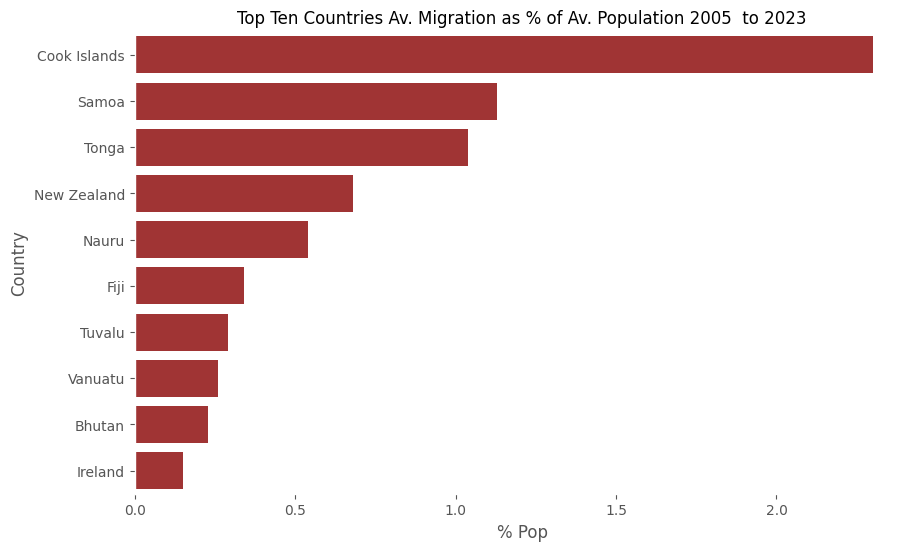

In [531]:
# Chart the countries with the highest average migration percentage of their population
top_percent = final.sort_values(by = '% Pop',ascending = False).head(10)

fig, ax = plt.subplots(figsize = (10,6))
ax = sns.barplot(data = top_percent, y = top_percent['Country'], x = top_percent['% Pop'], color = 'firebrick')
plt.title("Top Ten Countries Av. Migration as % of Av. Population 2005  to 2023", fontsize = 12)
ax.set_facecolor("white")
;

In [458]:
# Look for high immigration source countries
high_immig = ['China','India','UK','New Zealand']

final[final['Country'].isin(high_immig)]

,Country,Migration,Pop(mn),GDP(bn),GDP per Capita,% Pop
1,New Zealand,29382.0,4.344667,160.792471,37009.155298,0.68
23,UK,37058.0,60.856419,2516.931110,41358.514947,0.06
101,China,52300.0,1293.188157,8687.654180,6718.012483,0.00
111,India,50868.0,1226.690415,1828.362874,1490.484357,0.00


#### Migration as % of Population

* We can see that the Cook Islands has the highest percentage for average yearly migration over population at 2.3%
* For some of the high immigration countries like China and India the percentage is quite small
* We cannot assume that the Cook Islands loses 2.3% of its population per year, so over the 19 year period as people will likely go backwards and forwards for work etc.
* Migration from the Cook Islands rather than New Zealand has coincided with declining economic conditions in New Zealand.

## 3.11 Average Migration by Country

In [532]:
# Create interactive map of average migration
fig = px.choropleth(locationmode="country names", 
                    locations = final.Country,
                    title = 'Average Annual Migration to Australia (2005 - 2022)',
                   color = final.Migration,
                    color_continuous_scale='viridis_r',
                    )
fig.update_layout(
    title_x=0.5,
    title_y=0.85)

fig.update_layout(coloraxis_colorbar_title_text = '')
fig.show()

## 3.12 Migration against GDP and Population

In [533]:
# Have a look at the correlation coefficients
final[['Migration','Pop(mn)','GDP(bn)']].corr()

,Migration,Pop(mn),GDP(bn)
Migration,1.000000,0.806145,0.465138
Pop(mn),0.806145,1.000000,0.522680
GDP(bn),0.465138,0.522680,1.000000


In [534]:
# Calculate the correlation coefficient with a p-value
from scipy import stats
pearson_coef, p_value = stats.pearsonr(final['Migration'], final['Pop(mn)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8061452133606943  with a P-value of P = 2.44618077698854e-43


Since the p-value is <0.001, the correlation between migration and population is statistically significant, and the linear relationship is quite strong (~0.808, close to 1).

The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

When the:
* p-value is 
 0.001: we say there is strong evidence that the correlation is significant.
* the p-value is 
 0.05: there is moderate evidence that the correlation is significant.
* the p-value is 
 0.1: there is weak evidence that the correlation is significant.
* the p-value is 
 0.1: there is no evidence that the correlation is significant.

In [535]:
# Look at dataframe
final.head()

,Country,Migration,Pop(mn),GDP(bn),GDP per Capita,% Pop
1,New Zealand,29382,4.344667,160.792471,37009.155298,0.68
2,New Caledonia,142,0.244964,8.256465,33704.774416,0.06
3,PNG,1443,7.903197,16.985535,2149.198007,0.02
4,Solomon Islands,441,0.563575,1.066076,1891.631560,0.08
5,Vanuatu,662,0.254695,0.671668,2637.149154,0.26


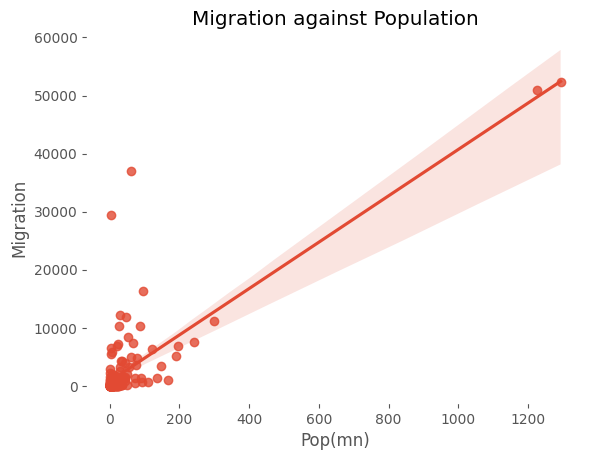

In [544]:
# Scatterplot of Migration against Population 

ax = sns.regplot(data =final, 
                x = 'Pop(mn)', 
                y = 'Migration', 
                )
ax.set_facecolor("white")
plt.title('Migration against Population');

In [545]:
# Get the slope of the line
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())
print(intercept,slope)

791.1282175247143 39.933155242099915


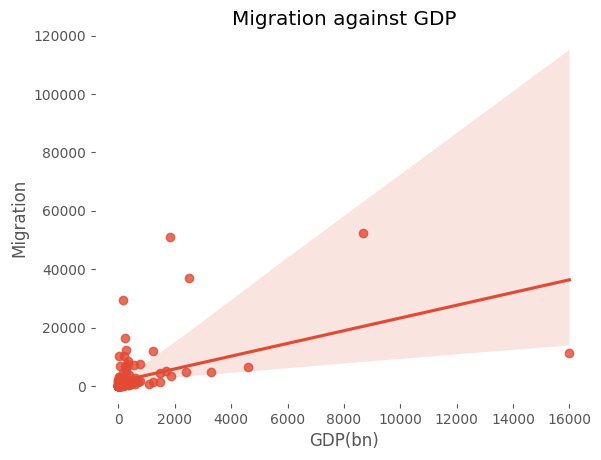

In [546]:
# Scatterplot of Migration against GDP 

ax = sns.regplot(data =final, 
                x = 'GDP(bn)', 
                y = 'Migration', 
                )
ax.set_facecolor("white")
plt.title('Migration against GDP');

In [547]:
# Get the slope of the line
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())
print(intercept,slope)

1480.8214119074073 2.179611461808749


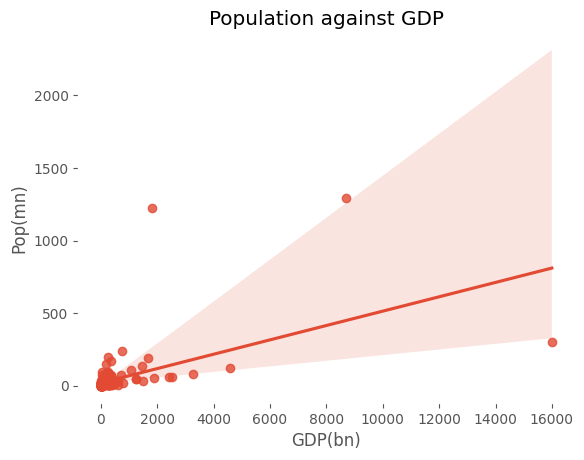

In [548]:
# Scatterplot of Population against GDP 

ax = sns.regplot(data =final, 
                x = 'GDP(bn)', 
                y = 'Pop(mn)', 
                )
ax.set_facecolor("white")
plt.title('Population against GDP');

In [549]:
# Get the slope of the line
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())
print(intercept,slope)

19.11304062910574 0.04944384477259314


What happens if we exclude China and India from the analysis?

In [600]:
# Exclude china and india and recalculate the correlation
test_df = final[(final['Country']!='China') & (final['Country']!='India')]
test_df[['Migration','Pop(mn)','GDP(bn)']].corr()

,Migration,Pop(mn),GDP(bn)
Migration,1.000000,0.364629,0.323135
Pop(mn),0.364629,1.000000,0.618569
GDP(bn),0.323135,0.618569,1.000000


* Population and migration are highly positively correlated
* Migration is weakly correlated with GDP
* Population and GDP is also weakly correlated
* Removing China and India, affects the correlation between migration and population significantly

## 3.13 World Bank Income Categories

* We want to add another column which splits the countries into the World Bank Income Categories. 
* The World Bank creates a yearly classification of countries by income, for all countries with population over 30,000.
* This classification stays the same throughout the fiscal year (from July 1 to June 30) even if the income data for a country changes.
* Low-income countries are those with a gross national income (GNI) per capita of US 1,135 or less in 2022
* Lower-middle-income countries are those with a GNI per capita between US 1,136 and US 4,465 in 2022
* Upper-middle-income countries are those with a GNI per capita between US 4,466 and US 13,845 in 2022
* High-income countries are those with a GNI per capita of US 13,846 or more in 2022

We will use this to split our countries into low, low-middle, upper-middle and high income

We will make a simplistic assumption that a country remains within category over the period which is not necessarily the case. 

[World Bank Income Categories](https://ourworldindata.org/grapher/world-banks-income-groups#:~:text=For%20the%20current%202024%20fiscal,those%20with%20a%20GNI%20per)


In [550]:
# Define the bins and labels for categorization
bins = [0, 1135, 4465, 13845, float('inf')]
labels = ['Low', 'Low-middle', 'Upper-middle', 'High']

# Use pd.cut() to create categories based on 'GDP per Capita' column values
final['IncomeCat'] = pd.cut(final['GDP per Capita'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame with the new 'IncomeCat' column
final

,Country,Migration,Pop(mn),GDP(bn),GDP per Capita,% Pop,IncomeCat
1,New Zealand,29382,4.344667,160.792471,37009.155298,0.68,High
2,New Caledonia,142,0.244964,8.256465,33704.774416,0.06,High
3,PNG,1443,7.903197,16.985535,2149.198007,0.02,Low-middle
4,Solomon Islands,441,0.563575,1.066076,1891.631560,0.08,Low-middle
5,Vanuatu,662,0.254695,0.671668,2637.149154,0.26,Low-middle
...,...,...,...,...,...,...,...
210,Eswatini,18,1.069041,3.750936,3508.693515,0.00,Low-middle
211,Tanzania,232,48.415422,39.956521,825.284986,0.00,Low
212,Uganda,230,34.637792,24.918036,719.388693,0.00,Low
213,Zambia,339,14.780726,18.993276,1285.002914,0.00,Low-middle


In [574]:
final.groupby('IncomeCat',as_index = False)['Migration'].mean()

,IncomeCat,Migration
0,Low,756.703704
1,Low-middle,2431.057692
2,Upper-middle,2266.600000
3,High,2890.018519


''

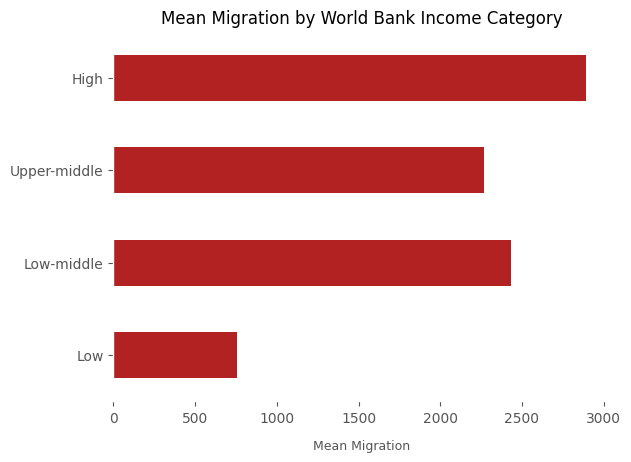

In [577]:
# Groupby category and apply to the migration averages to get a mean value for each group
cat_income = final.groupby('IncomeCat',as_index = False)['Migration'].mean()

l = ['Low','Low-middle','Upper-middle','High']
ax = cat_income.plot(kind = 'barh',color = 'firebrick')
ax.set_yticklabels(cat_income.IncomeCat)
ax.set_title("Mean Migration by World Bank Income Category", fontsize = 12)
ax.get_legend().set_visible(False)
ax.set_xlabel("Mean Migration", fontsize = 9, labelpad = 10)
ax.set_facecolor("white")
;

In [578]:
# Top migration countries that are high income
final[final['IncomeCat']=='High'].sort_values(by = 'Migration',ascending = False).head()

,Country,Migration,Pop(mn),GDP(bn),GDP per Capita,% Pop,IncomeCat
23,UK,37058,60.856419,2516.931110,41358.514947,0.06,High
1,New Zealand,29382,4.344667,160.792471,37009.155298,0.68,High
108,"Korea, South",11877,47.720471,1239.219677,25968.303724,0.02,High
127,USA,11226,299.797864,15999.061380,53366.162082,0.00,High
105,Taiwan,7139,23.402245,541.922105,23156.842656,0.03,High


In [579]:
# Top migration countries that are low-middle income
final[final['IncomeCat']=='Low-middle'].sort_values(by = 'Migration',ascending = False).head()

,Country,Migration,Pop(mn),GDP(bn),GDP per Capita,% Pop,IncomeCat
111,India,50868,1226.690415,1828.362874,1490.484357,0.00,Low-middle
98,Philippines,16404,95.430581,243.594349,2552.581636,0.02,Low-middle
94,Vietnam,10317,85.939295,195.642342,2276.517897,0.01,Low-middle
96,Indonesia,7614,240.443482,751.805946,3126.747047,0.00,Low-middle
114,Pakistan,6934,194.610333,237.084481,1218.252276,0.00,Low-middle


In [580]:
# Top migration countries that are upper-middle income
final[final['IncomeCat']=='Upper-middle'].sort_values(by = 'Migration',ascending = False).head()

,Country,Migration,Pop(mn),GDP(bn),GDP per Capita,% Pop,IncomeCat
101,China,52300,1293.188157,8687.654180,6718.012483,0.00,Upper-middle
97,Malaysia,12234,28.641937,261.280150,9122.293135,0.04,Upper-middle
209,South Africa,8394,51.509093,333.687600,6478.227115,0.02,Upper-middle
93,Thailand,7360,65.726232,350.373322,5330.798824,0.01,Upper-middle
130,Brazil,5234,191.506499,1673.789001,8740.115945,0.00,Upper-middle


In [581]:
# Top migration countries that are low income
final[final['IncomeCat']=='Low'].sort_values(by = 'Migration',ascending = False).head()

,Country,Migration,Pop(mn),GDP(bn),GDP per Capita,% Pop,IncomeCat
113,Nepal,10244,26.365993,20.670721,783.991749,0.04,Low
116,Afghanistan,3208,30.548554,13.337017,436.584235,0.01,Low
90,Myanmar,1976,48.205243,47.503555,985.443754,0.00,Low
91,Cambodia,1424,14.280675,15.363062,1075.793831,0.01,Low
197,Ethiopia,756,93.930260,53.094678,565.256367,0.00,Low


* High income countries have the highest mean migration and the lowest is from low income countries

## 3.14 GDP per Capita

In [601]:
# Check null values
final.isnull().sum()

Country           0
Migration         0
Pop(mn)           0
GDP(bn)           0
GDP per Capita    0
% Pop             0
IncomeCat         0
dtype: int64

In [554]:
# Find null value
final[final['IncomeCat'].isnull()]

,Country,Migration,Pop(mn),GDP(bn),GDP per Capita,% Pop,IncomeCat
40,Gibraltar,10,0.030051,-1.000000e-09,-0.000033,0.03,NaN


We have missing values for Gibraltar across all years so we will just drop this row as it will not impact our chart significantly

In [555]:
# Drop Gibraltar
final = final[final['Country']!='Gibraltar']

In [556]:
# Describe the GDP per Capital column
final['GDP per Capita'].describe()

count       183.000000
mean      15367.926834
std       23190.644713
min         169.770341
25%        1922.823751
50%        5545.306746
75%       19322.984623
max      174319.846529
Name: GDP per Capita, dtype: float64

* The GDP per Capita is very postively skewed as we might expect, there are a few outliers where the values are very high
* The median value is a long way from the mean value

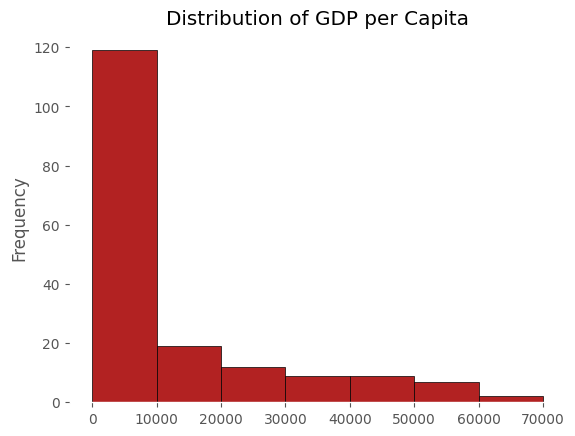

In [557]:
bins = [0,10000,20000,30000,40000,50000,60000,70000]
ax = final['GDP per Capita'].plot(kind = 'hist', ec = 'k', color = 'firebrick',bins = bins)
plt.title('Distribution of GDP per Capita')
ax.set_facecolor('white');

In [562]:
# Identify the outliers based on a z-score
from scipy import stats

z_scores = stats.zscore(final['GDP per Capita'])
outliers = final[(z_scores > 3) | (z_scores < -3)]
outliers.sort_values(by = 'GDP per Capita',ascending = False)

,Country,Migration,Pop(mn),GDP(bn),GDP per Capita,% Pop,IncomeCat
30,Monaco,11,0.033084,5.767161,174319.846529,0.03,High
29,Luxembourg,23,0.524190,56.349647,107498.428528,0.00,High
125,Bermuda,19,0.061145,6.026342,98557.621855,0.03,High


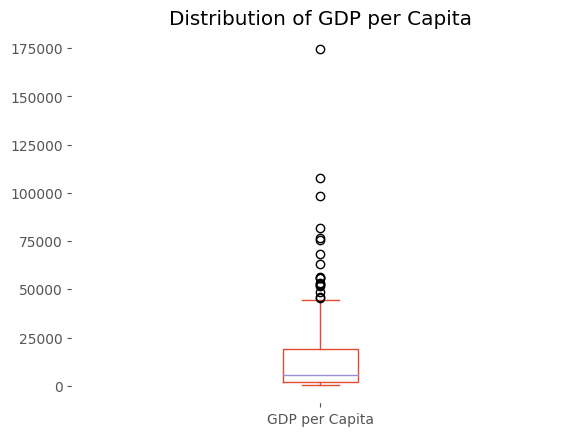

In [572]:
ax = final['GDP per Capita'].plot(kind = 'box')
plt.title('Distribution of GDP per Capita')
ax.set_facecolor("white");

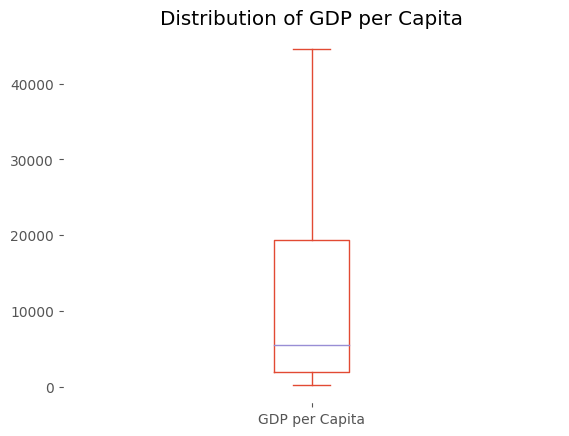

In [560]:
ax = final['GDP per Capita'].plot(kind = 'box',showfliers = False)
plt.title('Distribution of GDP per Capita')
ax.set_facecolor("white");

* The problem with the z-score is that it assumes a normal distribution in the data.
* There are quite a few outliers bunched around the 50000 to 75000 level

## 3.15 Migration against Population and World Bank Income Groups

In [587]:
# Copy the dataframe
scatter = final.copy()

In [641]:
scatter.sort_values(by = 'Pop(mn)',ascending = False).head(10)

,Country,Migration,Pop(mn),GDP(bn),GDP per Capita,% Pop,IncomeCat
101,China,52300,1293.188157,8687.654180,6718.012483,0.00,Upper-middle
111,India,50868,1226.690415,1828.362874,1490.484357,0.00,Low-middle
127,USA,11226,299.797864,15999.061380,53366.162082,0.00,High
96,Indonesia,7614,240.443482,751.805946,3126.747047,0.00,Low-middle
114,Pakistan,6934,194.610333,237.084481,1218.252276,0.00,Low-middle
130,Brazil,5234,191.506499,1673.789001,8740.115945,0.00,Upper-middle
188,Nigeria,1004,168.463742,359.097068,2131.598541,0.00,Low-middle
109,Bangladesh,3498,147.213788,189.609368,1287.986469,0.00,Low-middle
65,Russia,1320,136.078984,1460.164612,10730.272719,0.00,Upper-middle
106,Japan,6426,120.510082,4583.394846,38033.289495,0.01,High


''

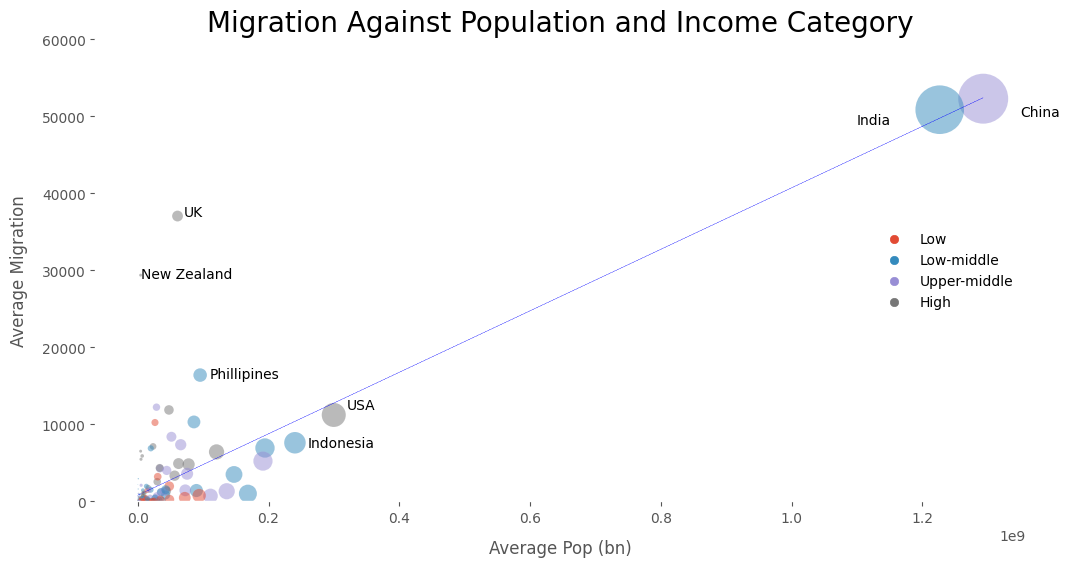

In [643]:
# Plot a scatterplot
size = scatter["Pop(mn)"]
x = scatter['Pop(mn)'] * 1000000

z = np.polyfit(scatter['Pop(mn)'], scatter['Migration'], 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize = (12,6))
sns.scatterplot(data =scatter, 
                x = x, 
                y = 'Migration',  
                s = size,
                hue = 'IncomeCat',
                alpha = 0.5)
plt.title('Migration Against Population and Income Category', fontsize = 20)

plt.plot(scatter['Pop(mn)']*1000000,p(scatter['Pop(mn)']),"blue",linestyle = "--",linewidth = 0.2,alpha = 1) 
plt.xlabel('Average Pop (bn)', labelpad = 10)
plt.ylabel('Average Migration', labelpad = 10)
plt.legend(loc = 'center right',facecolor = "white",edgecolor = 'white')
ax.set_facecolor("white")
plt.ylim(0,60000)

plt.text(320000000,12000,"USA")
plt.text(260000000,7000,"Indonesia")
plt.text(4990000,29000,"New Zealand")
plt.text(70000000,37000,"UK")
plt.text(1100000000,49000,"India")
plt.text(1350000000,50000,"China")
plt.text(110000000,16000,"Phillipines")


;

In [644]:
scatter_dropped = scatter[(scatter['Country']!='China') & (scatter['Country']!= 'India')]

''

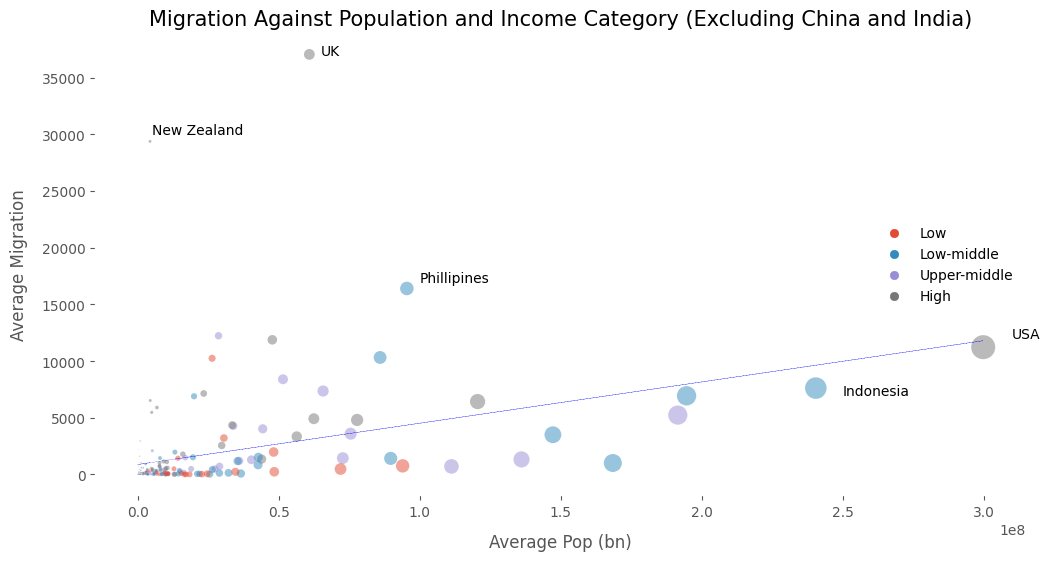

In [656]:
# Plot a scatterplot
size = scatter_dropped["Pop(mn)"]
x = scatter_dropped['Pop(mn)'] * 1000000

z = np.polyfit(scatter_dropped['Pop(mn)'], scatter_dropped['Migration'], 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize = (12,6))
sns.scatterplot(data =scatter_dropped, 
                x = x, 
                y = 'Migration',  
                s = size,
                hue = 'IncomeCat',
                alpha = 0.5)
plt.title('Migration Against Population and Income Category (Excluding China and India)', fontsize = 15)

plt.plot(scatter_dropped['Pop(mn)']*1000000,p(scatter_dropped['Pop(mn)']),"blue",linestyle = "--",linewidth = 0.2,alpha = 1) 
plt.xlabel('Average Pop (bn)', labelpad = 10)
plt.ylabel('Average Migration', labelpad = 10)
plt.legend(loc = 'center right',facecolor = "white",edgecolor = 'white')
ax.set_facecolor("white")
#plt.ylim(0,80000)

plt.text(310000000,12000,"USA")
plt.text(250000000,7000,"Indonesia")
plt.text(4900000,30000,"New Zealand")
plt.text(65000000,37000,"UK")
#plt.text(1100000000,95000,"India")
#plt.text(1292000000,90000,"China")
plt.text(100000000,17000,"Phillipines")


;

* We can see that with a few exceptions, the highest migration is from low-middle and upper-middle countries  of which China and India are the highest
* Low income countries also have low migration on average

### 3.9.6 Income Categories as a Proportion of the Whole

If we filter the dataframe for each category and get the mean of country migration within each, we can compare the groups

In [582]:
# Split out dataframe into separate ones according to the world bank income category
low = final[final['IncomeCat']=='Low']
low_mid = final[final['IncomeCat']=='Low-middle']
up_mid = final[final['IncomeCat']=='Upper-middle']
high = final[final['IncomeCat']=='High']

In [583]:
# Get the totals and print
low_mig = low['Migration'].sum()
low_mid_mig = low_mid['Migration'].sum()
up_mid_mig = up_mid['Migration'].sum()
high_mig = high['Migration'].sum()

print(low_mig)
print(low_mid_mig)
print(up_mid_mig)
print(high_mig)

20431
126415
113330
156061


In [584]:
# Lets express this in terms of 50 blocks
total = low_mig + low_mid_mig + up_mid_mig + high_mig
low_prop = low_mig/total*50
low_mid_prop = low_mid_mig/total*50
up_mid_prop = up_mid_mig/total*50
high_prop = high_mig/total*50

In [585]:
data = {'Low': low_prop, 'Low-middle': low_mid_prop, 'Upper-middle': up_mid_prop,'High':high_prop}

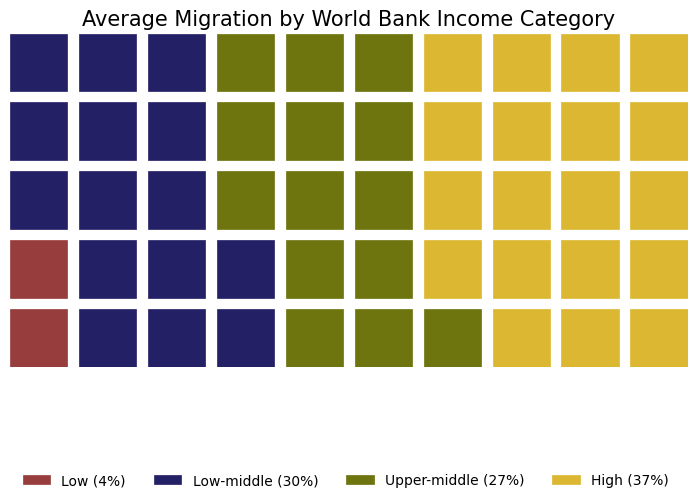

In [586]:
# Plot waffle
fig = plt.figure(
    figsize = (15,5),
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=data,
    colors=["#983D3D","#232066","#6E750E", "#DCB732",],
    title={
        'label': 'Average Migration by World Bank Income Category',
        'loc': 'center',
        'fontdict': {
            'fontsize': 15
        }
    },
    labels=[f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()],
    legend={
        # 'labels': [f"{k} ({v}%)" for k, v in data.items()],  
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.4),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 10
    }
)

* High income countries account for the highest mean migration and low income the lowest. 
* Even though the other two groups include China and India, they are outliers amongst their groups so average annual migration from other low-middle and upper-middle income countries is relatively low in comparison.